In [124]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [126]:
paths = np.load(os.path.join(os.getcwd(), 'EDA', 'del_path.npy'))
len(paths)

8

In [127]:
cf_dir = os.path.join(os.getcwd(), 'train_log_10', 'test')
cf_path = os.path.join(cf_dir, 'confusion_matrix.npy')
label_path = os.path.join(os.getcwd(), 'EDA', 'top100.npy')

In [128]:
label = np.load(label_path)
cf = np.load(cf_path)

In [42]:
list(label).index('서울농아인협회')

70

In [45]:
cf[70][70]

0.0

In [129]:
import matplotlib
matplotlib.rcParams['font.family'] = 'AppleGothic'
matplotlib.rcParams['axes.unicode_minus'] = False

# plt.rc('font', family='NanumGothicOTF')

<Axes: >

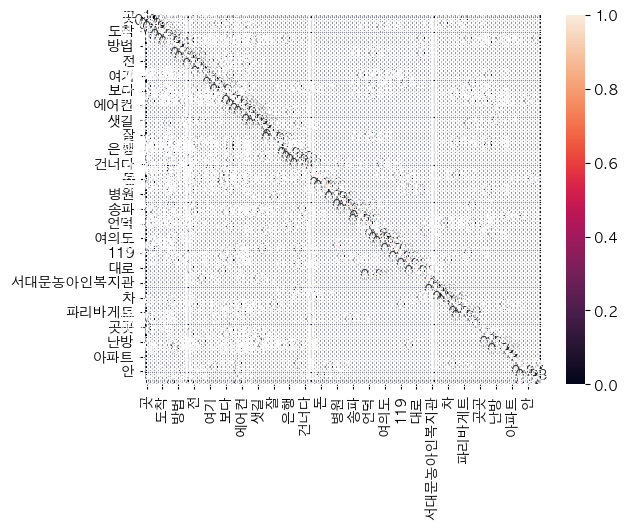

In [56]:
df_cm = pd.DataFrame(cf / np.sum(cf, axis=1), index=[x for x in label], columns=[x for x in label]).fillna(0)
sns.heatmap(df_cm, annot=True)

In [61]:
np.sum(cf, axis=1)

array([518., 380., 336., 305., 236., 226., 213., 161., 108., 105., 108.,
       102.,  98.,  86.,  80.,  79.,  74.,  71.,  69.,  66.,  65.,  63.,
        53.,  51.,  46.,  42.,  41.,  39.,  35.,  31.,  33.,  34.,  30.,
        29.,  28.,  27.,  27.,  27.,  28.,  25.,  26.,  25.,  24.,  25.,
        24.,  22.,  24.,  25.,  23.,  22.,  22.,  22.,  23.,  21.,  20.,
        21.,  23.,  22.,  22.,  21.,  24.,  20.,  22.,  19.,  20.,  24.,
        20.,  19.,  19.,  20.,  19.,  21.,  20.,  19.,  20.,  19.,  19.,
        19.,  23.,  18.,  19.,  17.,  16.,  19.,  19.,  18.,  17.,  17.,
        17.,  18.,  18.,  15.,  15.,  15.,  17.,  16.,  15.,  15.,  14.,
        14.])

0
0
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
1
1
2
2


/var/folders/76/mq28r9js2490jxdy_b1rhjgc0000gn/T/ipykernel_61347/2750972309.py:14: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(12, 7))


2
2
2
2
2
2
2
2
3
3
3
3
3
3
3
3
3
3
4
4
4
4
4
4
4
4
4
4
5
5
5
5
5
5
5
5
5
5
6
6
6
6
6
6
6
6
6
6
7
7
7
7
7
7
7
7
7
7
8
8
8
8
8
8
8
8
8
8
9
9
9
9
9
9
9
9
9
9


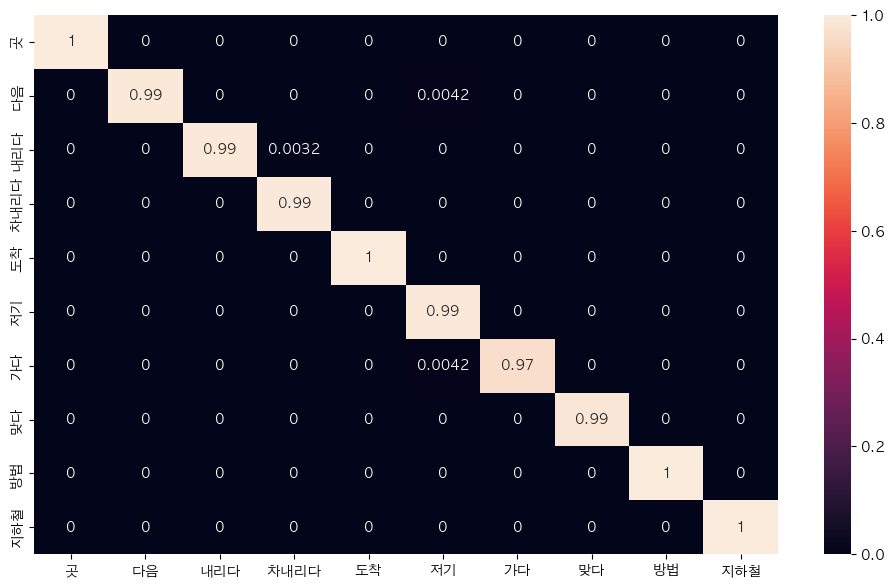

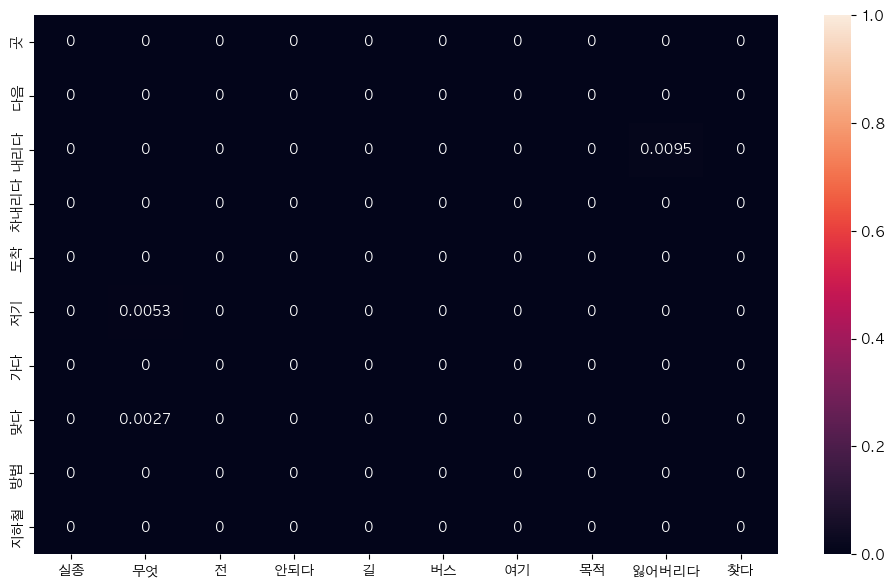

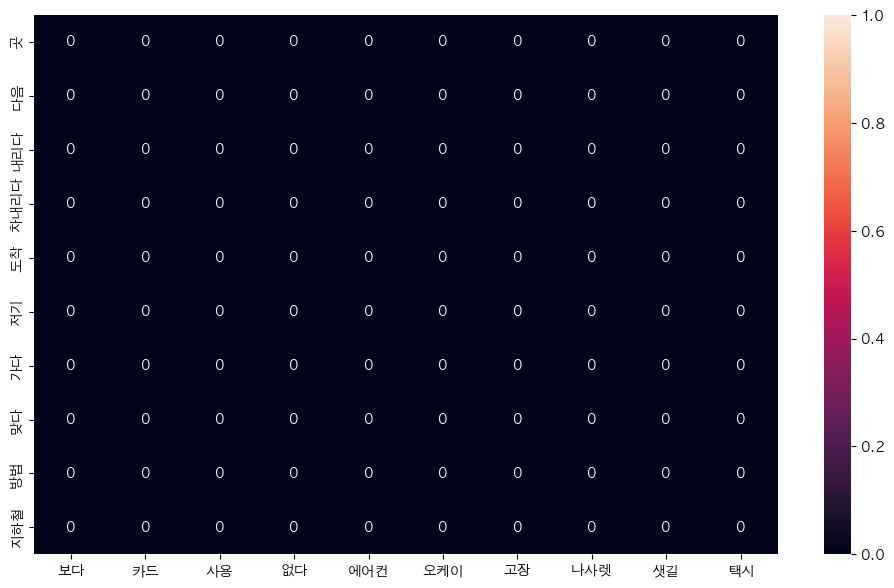

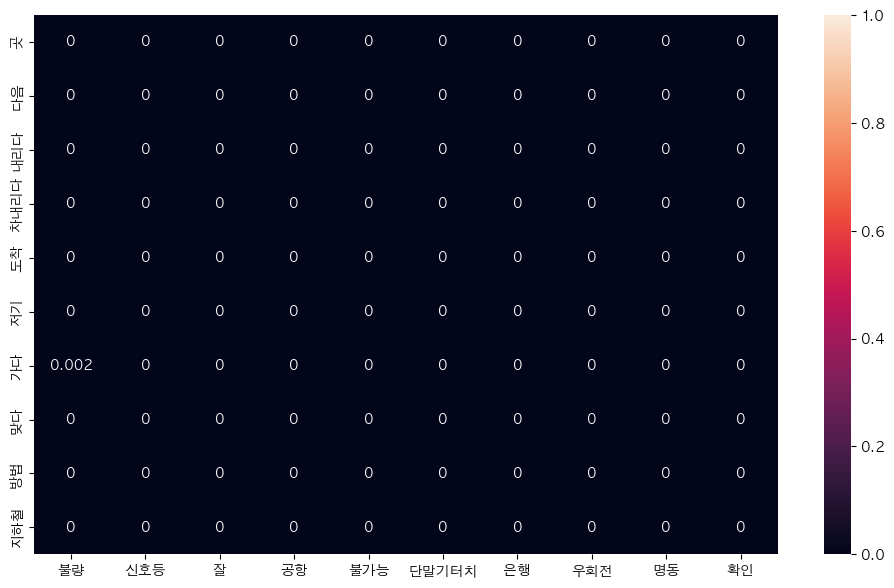

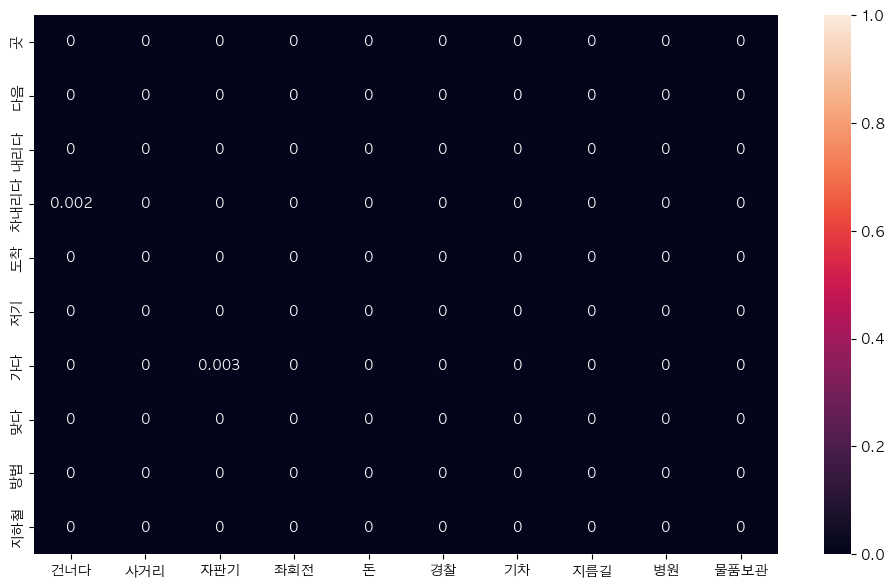

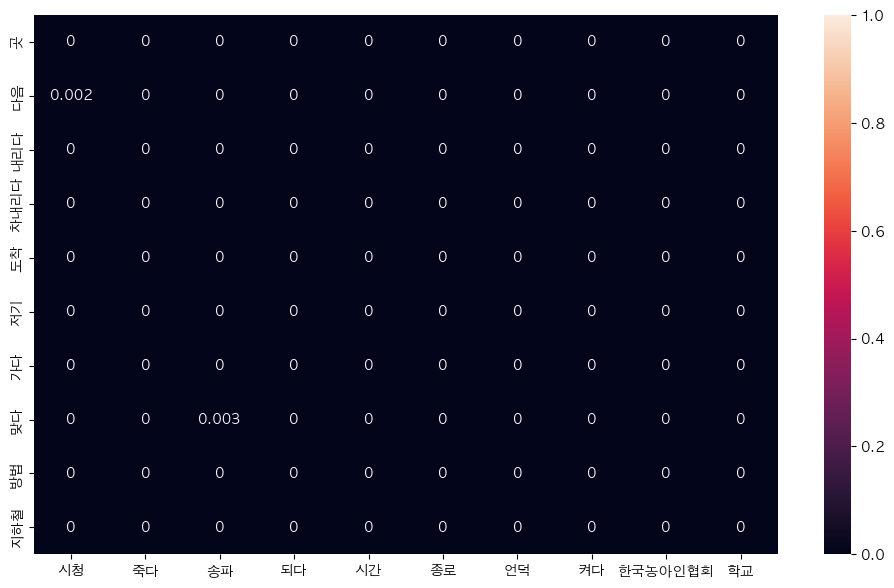

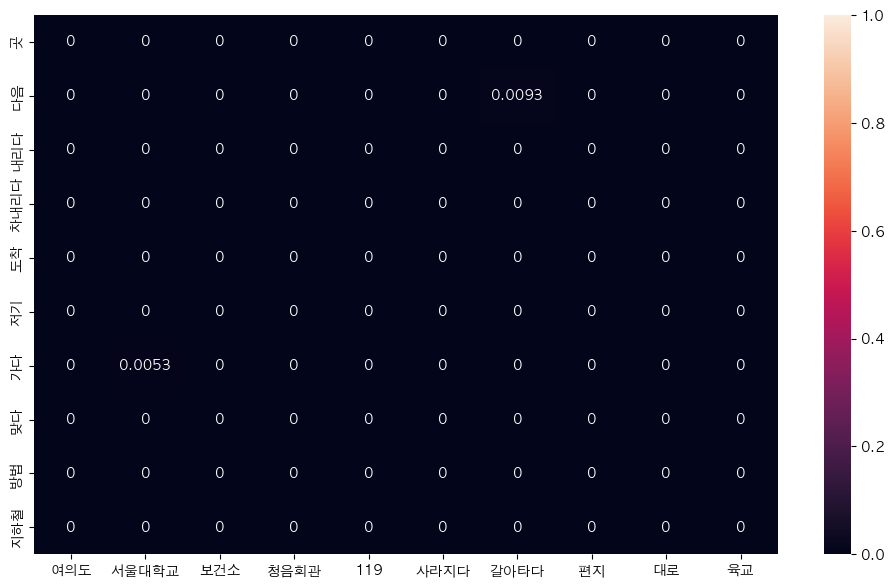

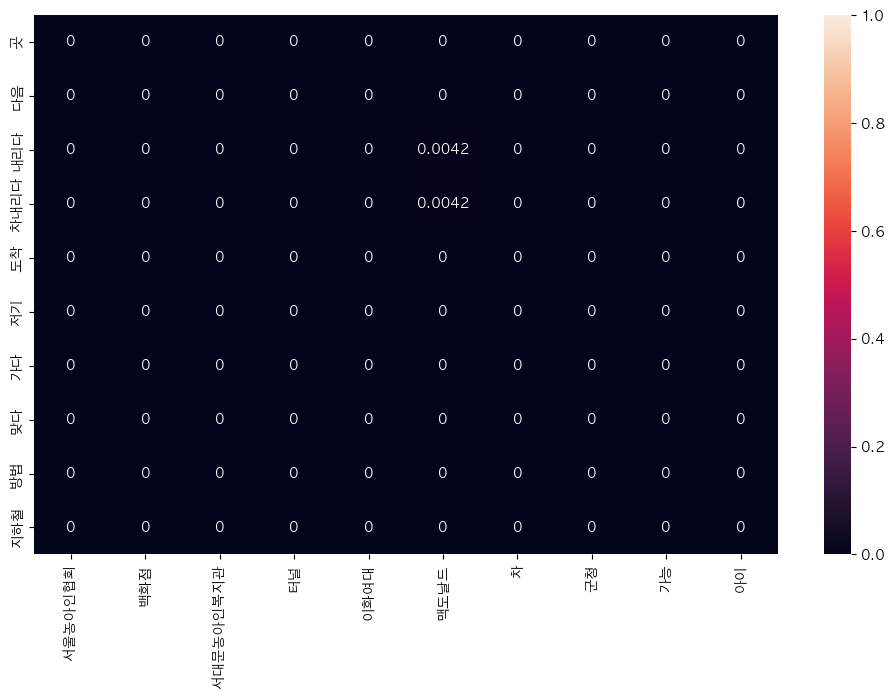

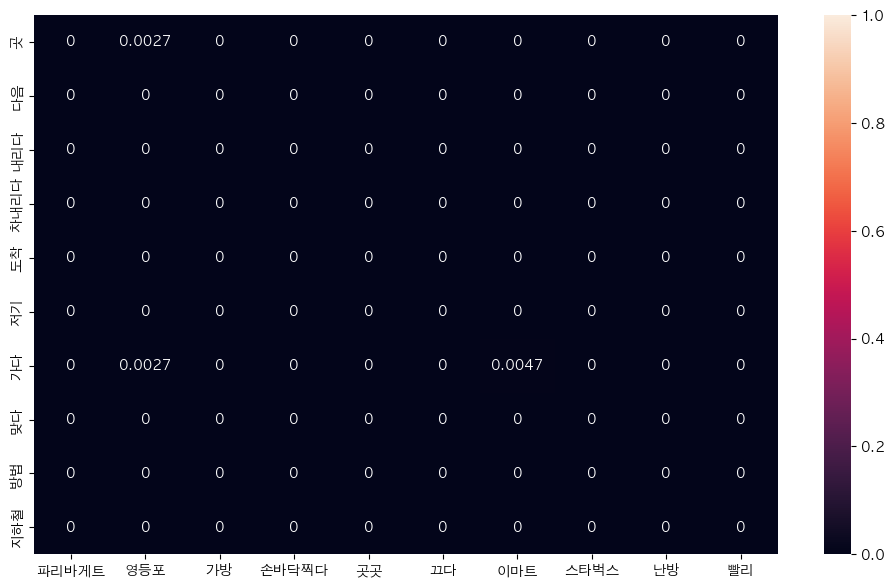

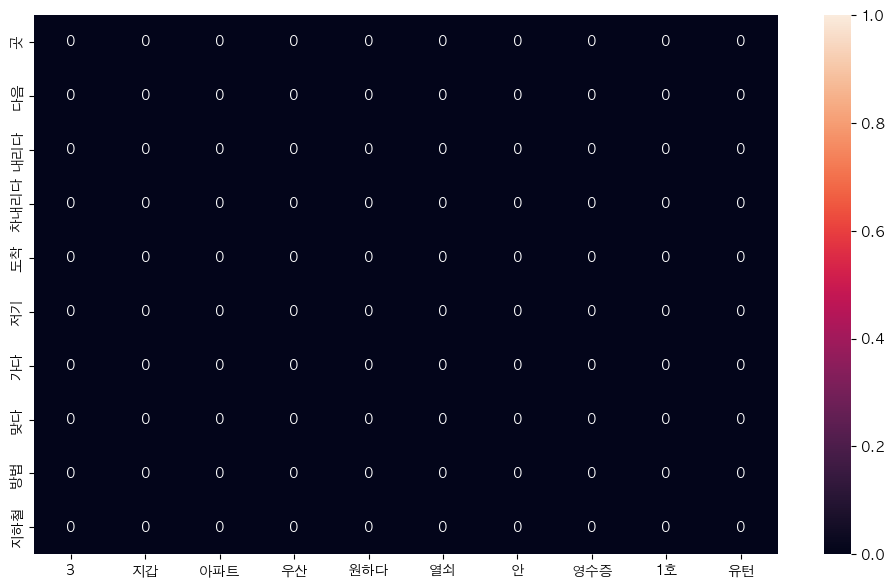

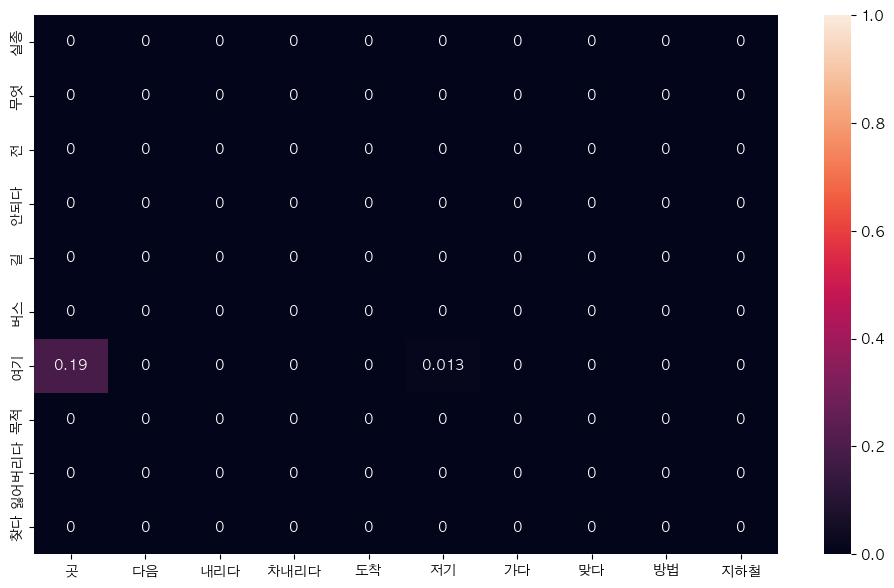

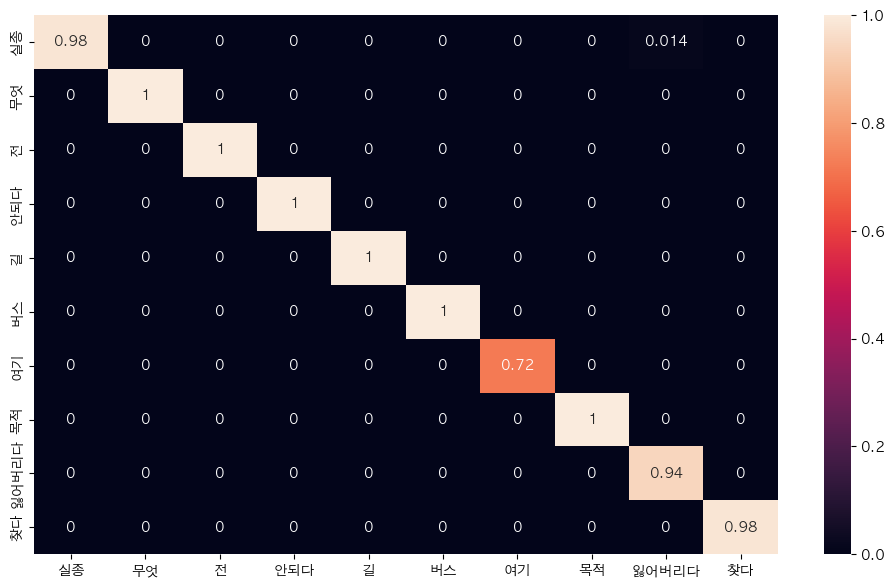

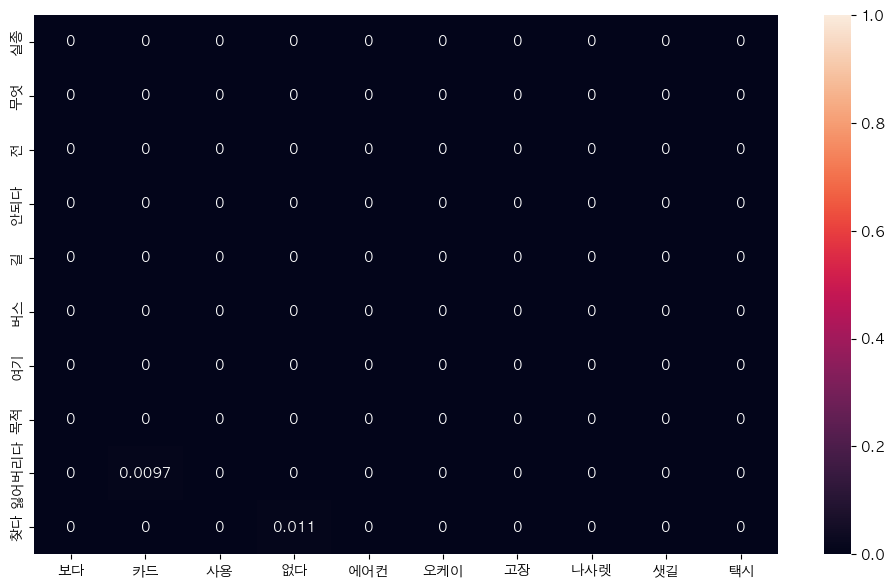

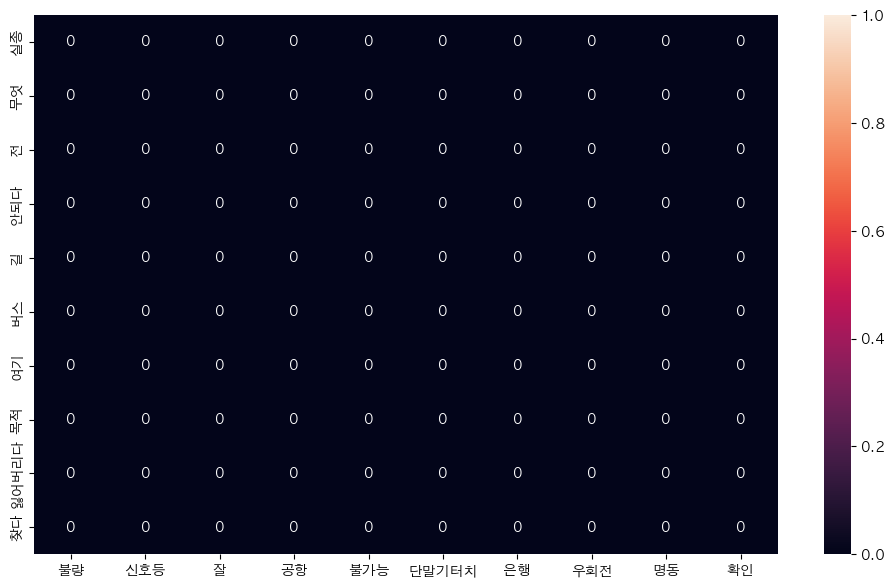

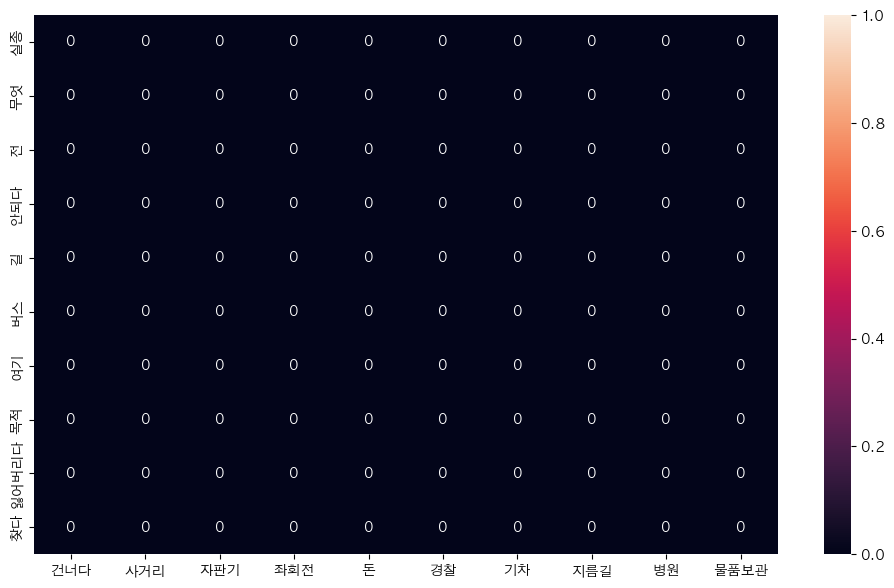

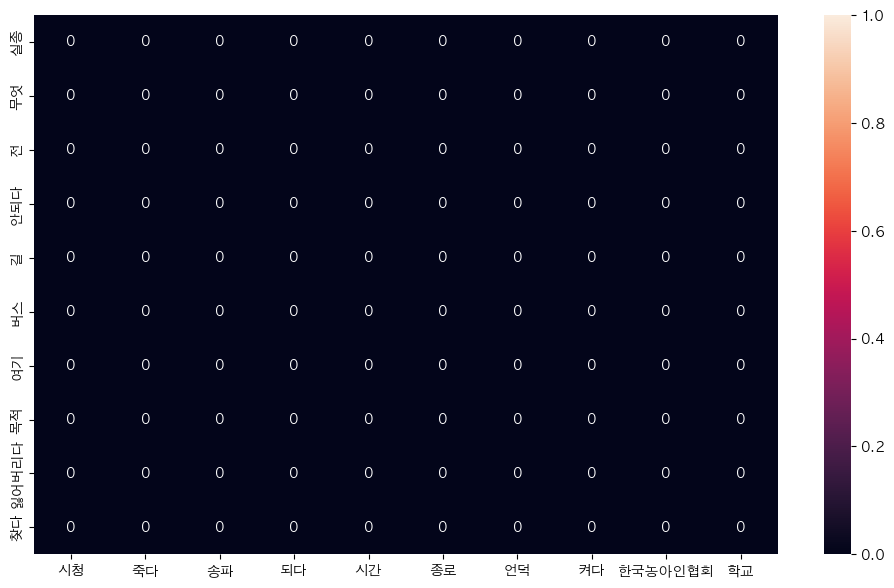

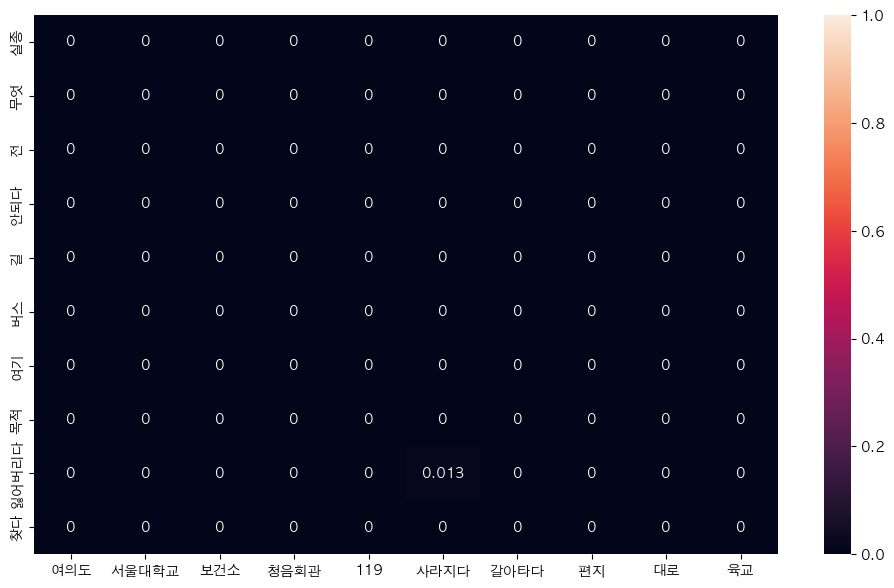

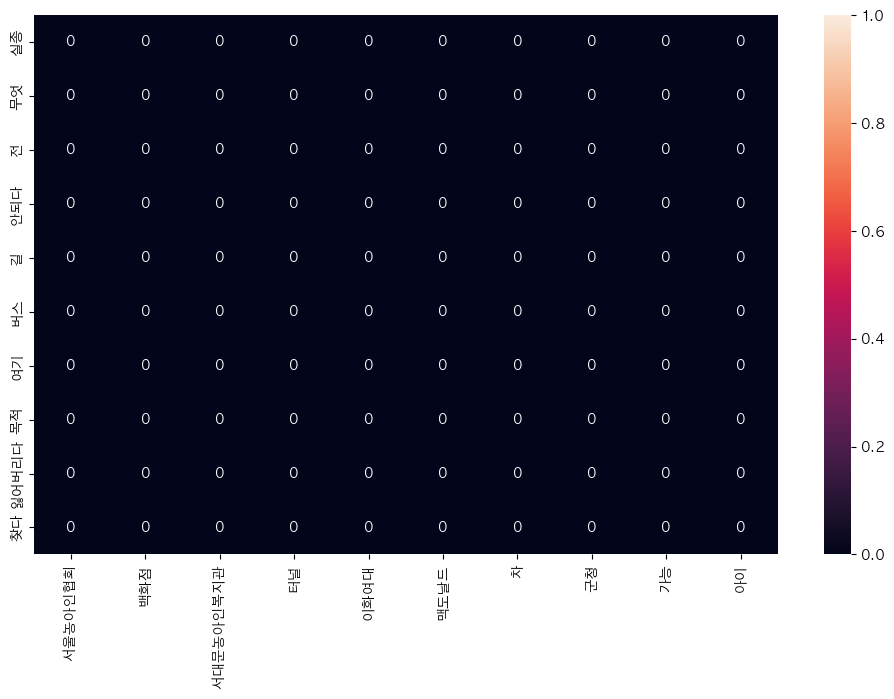

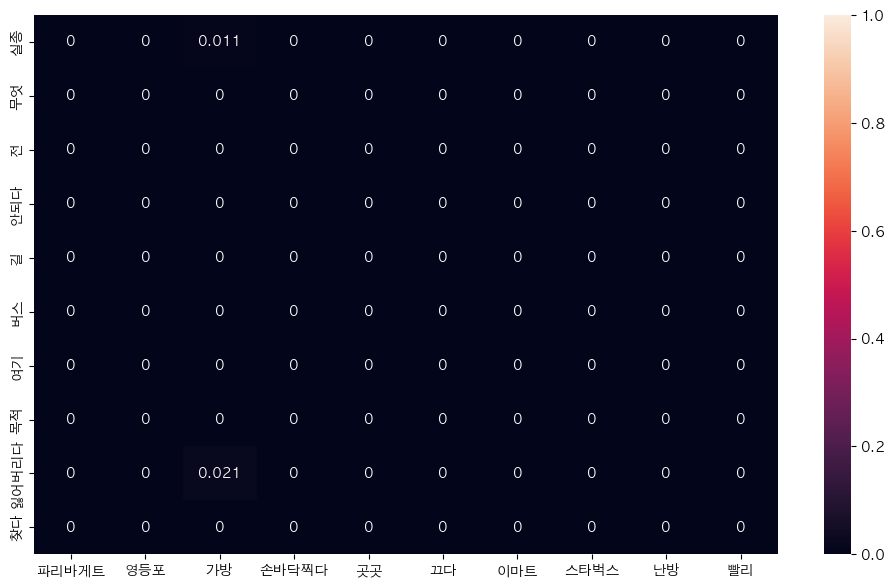

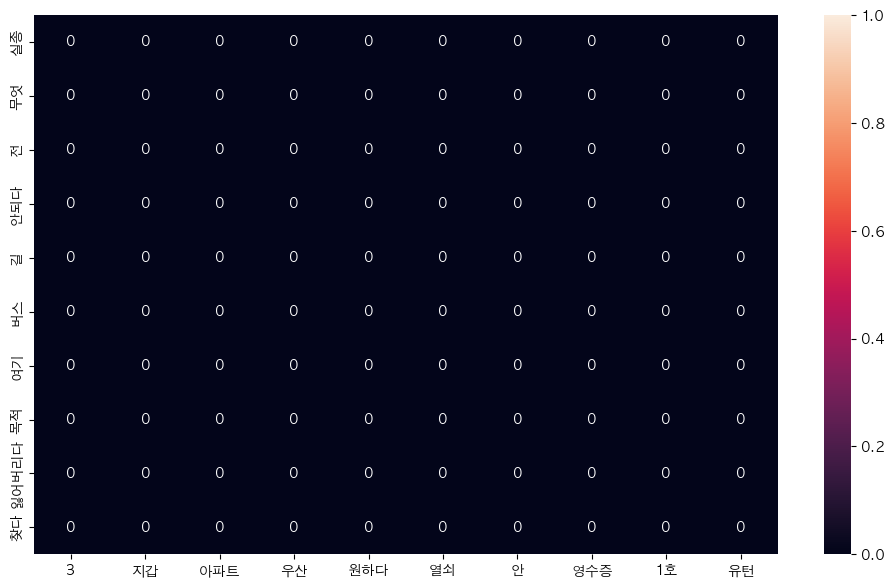

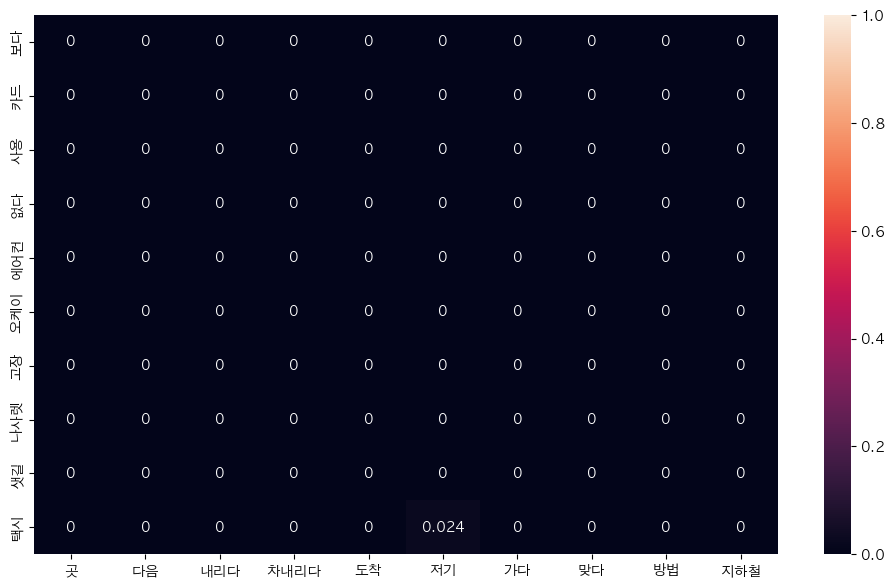

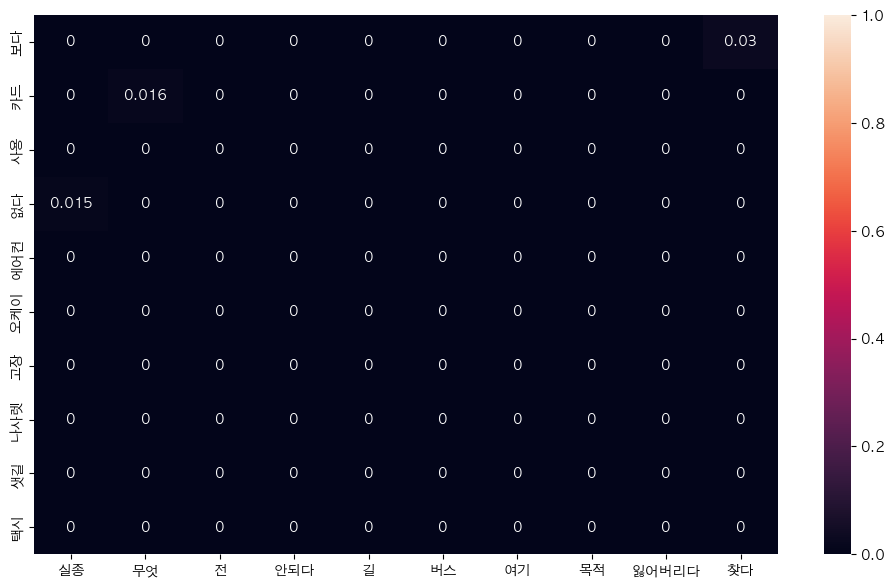

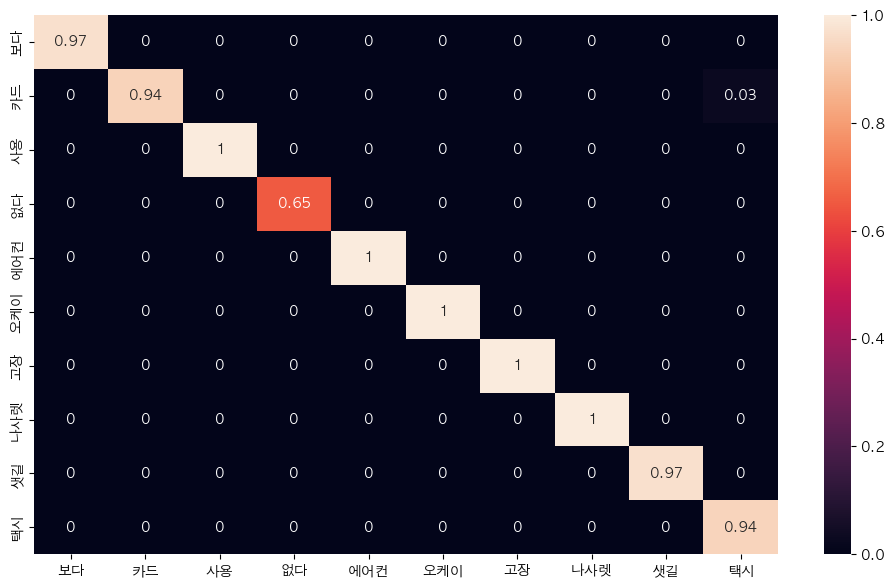

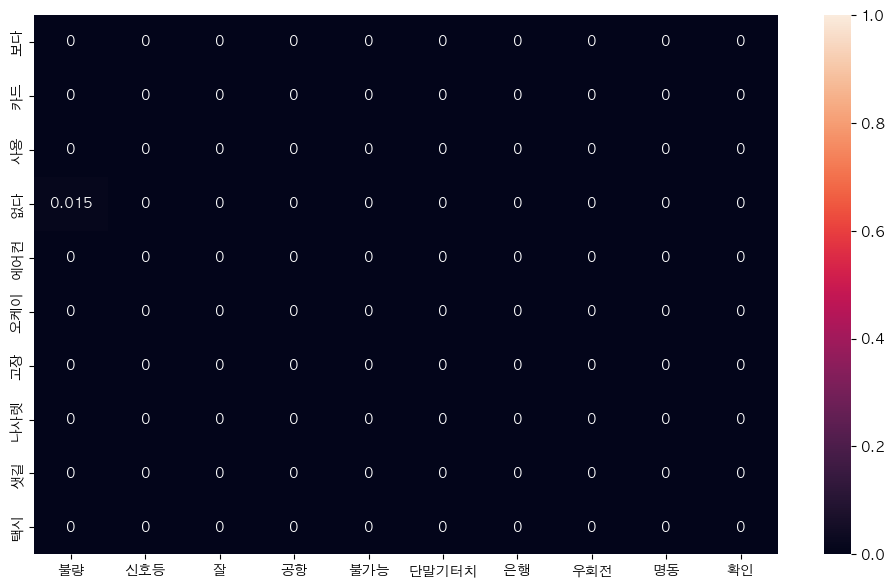

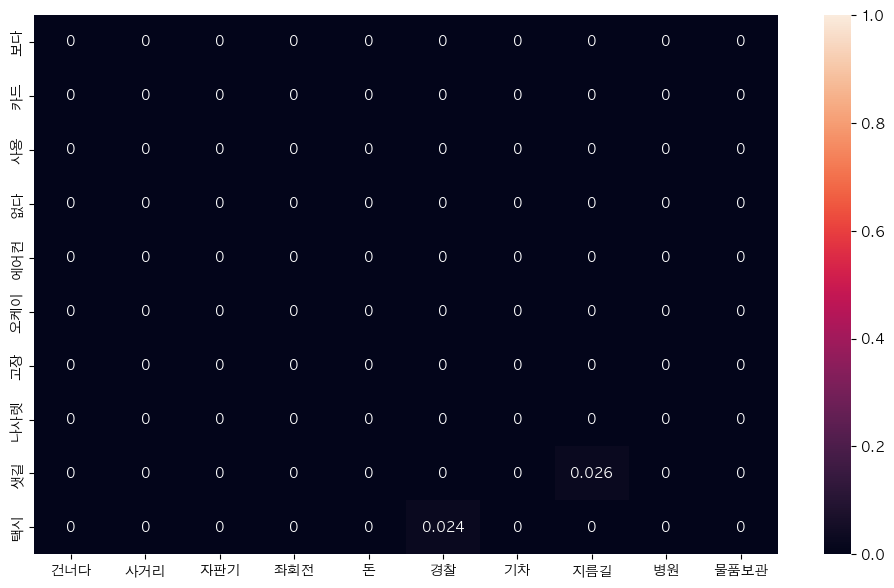

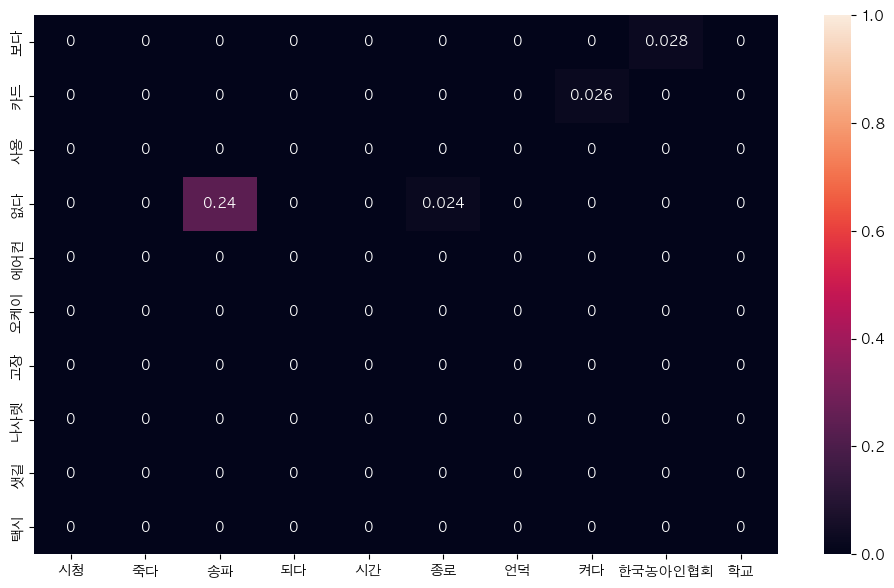

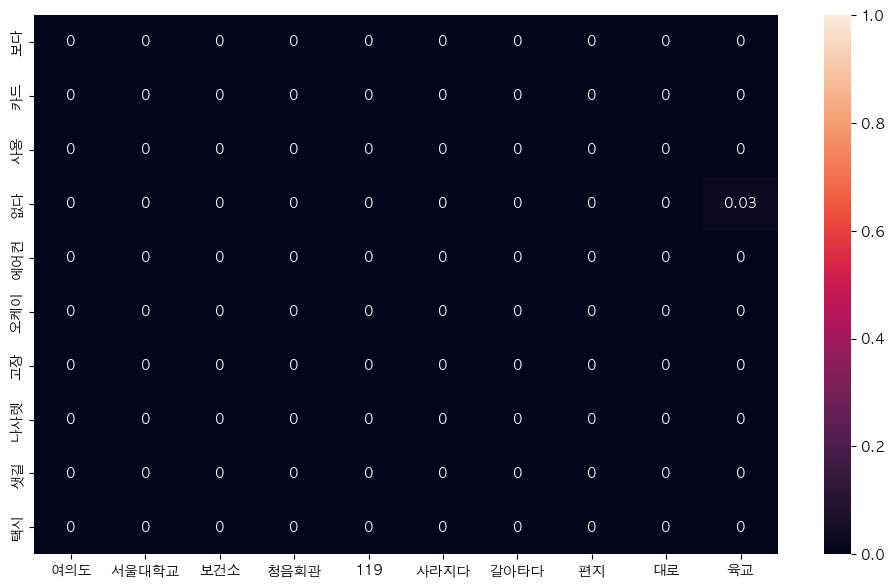

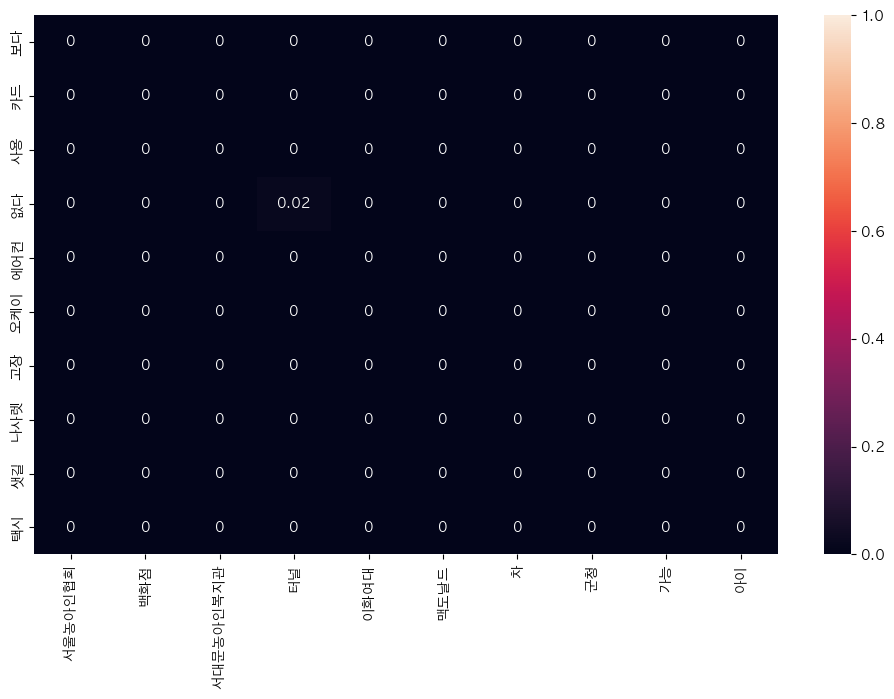

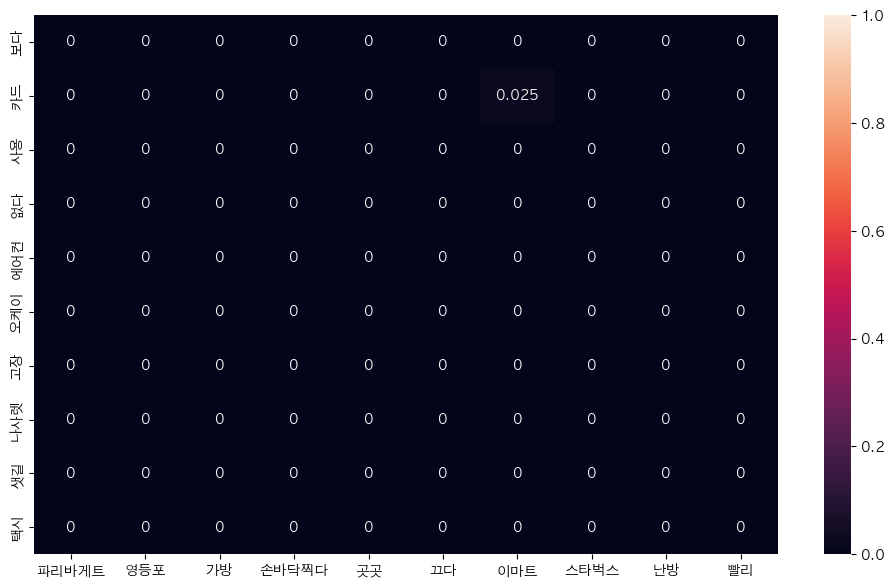

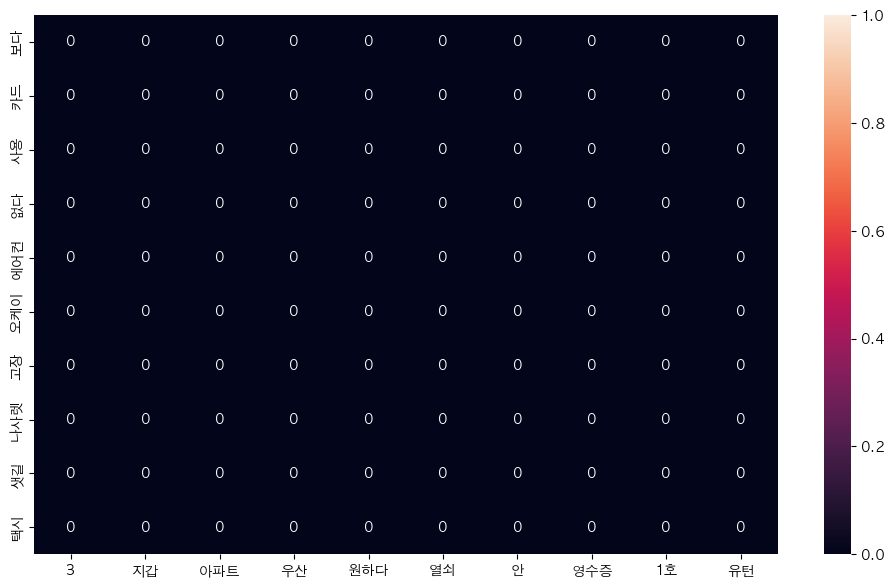

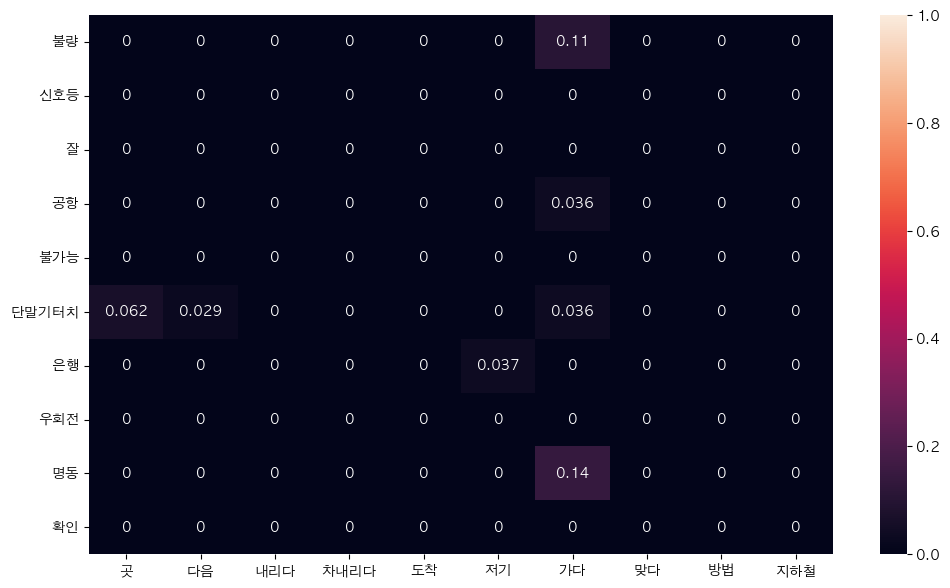

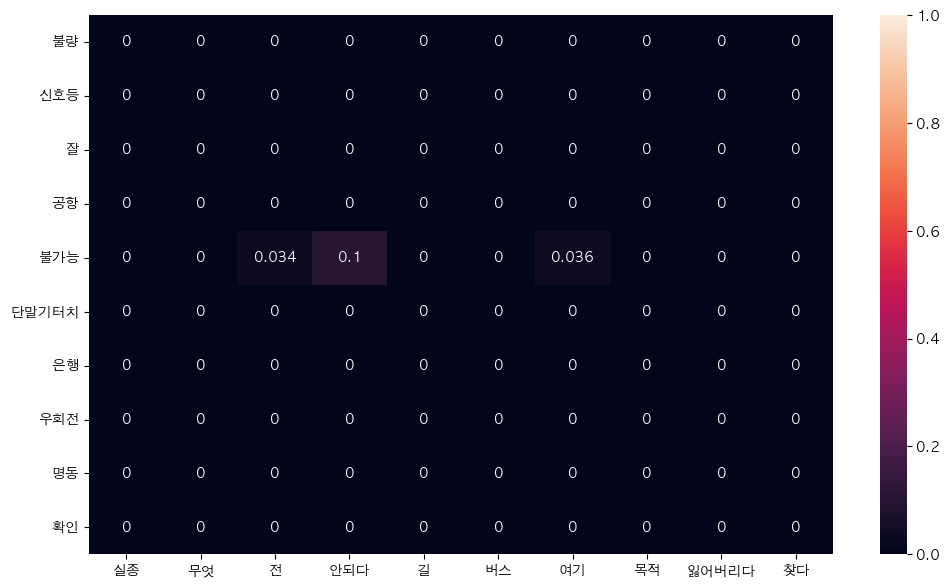

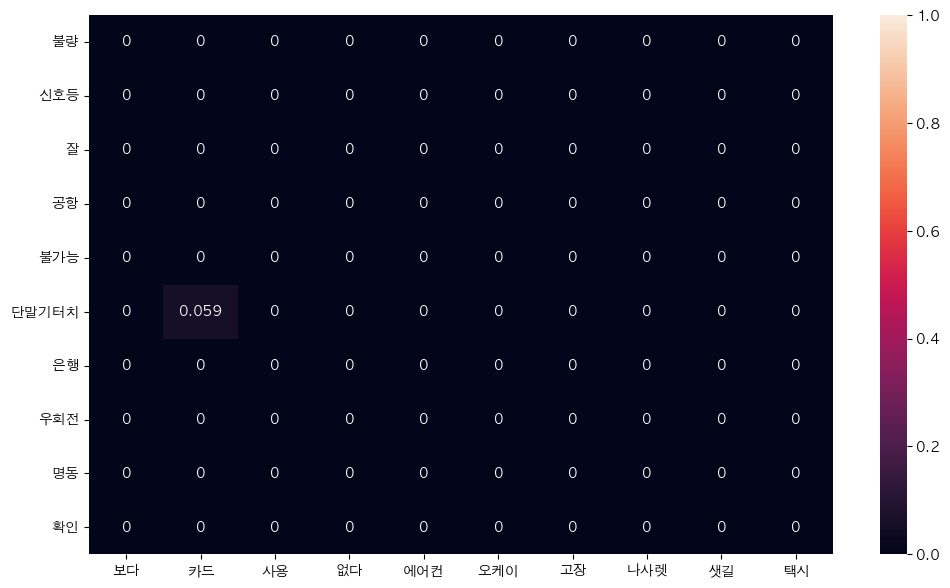

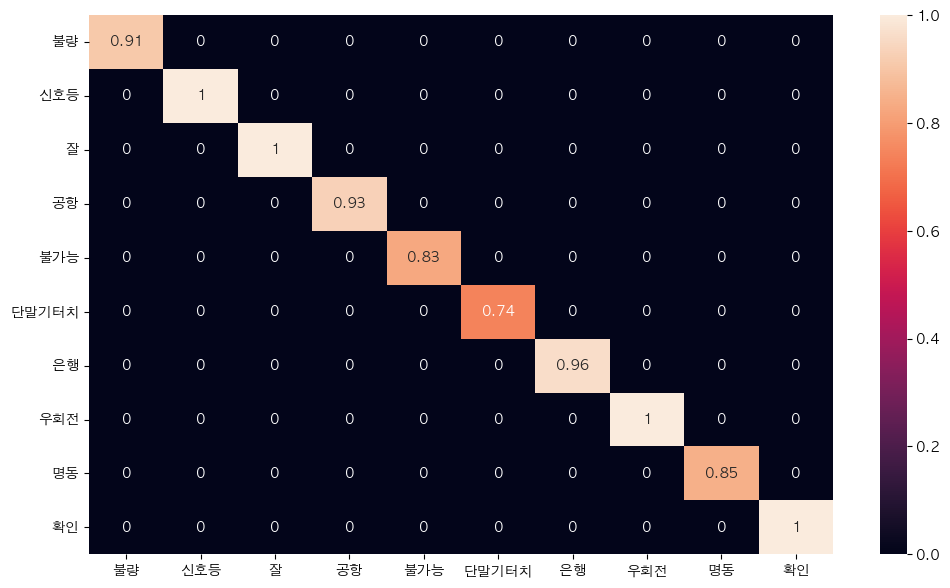

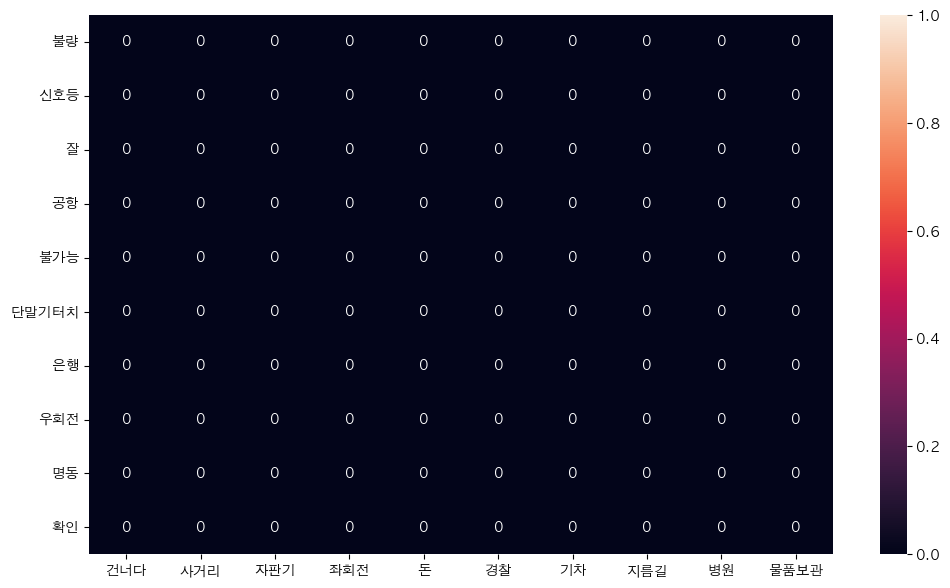

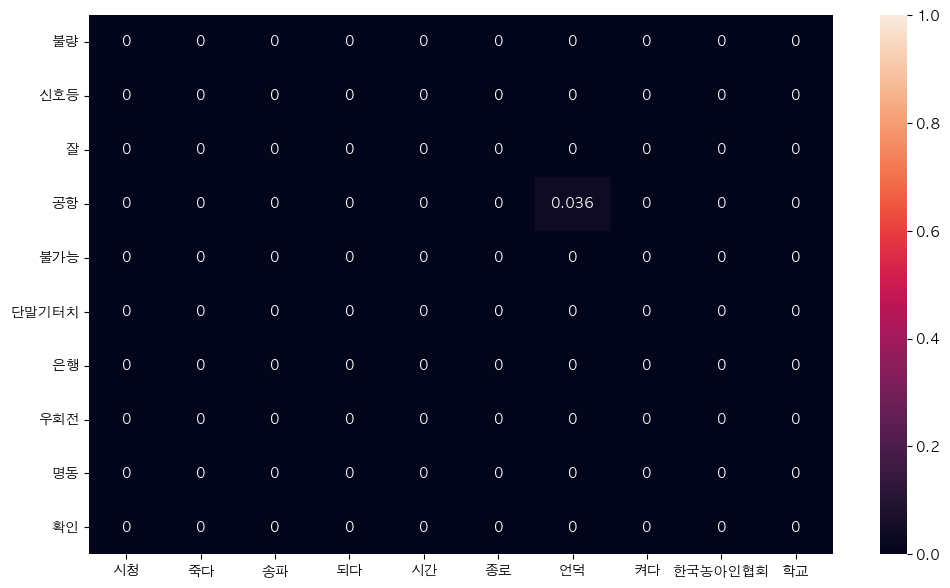

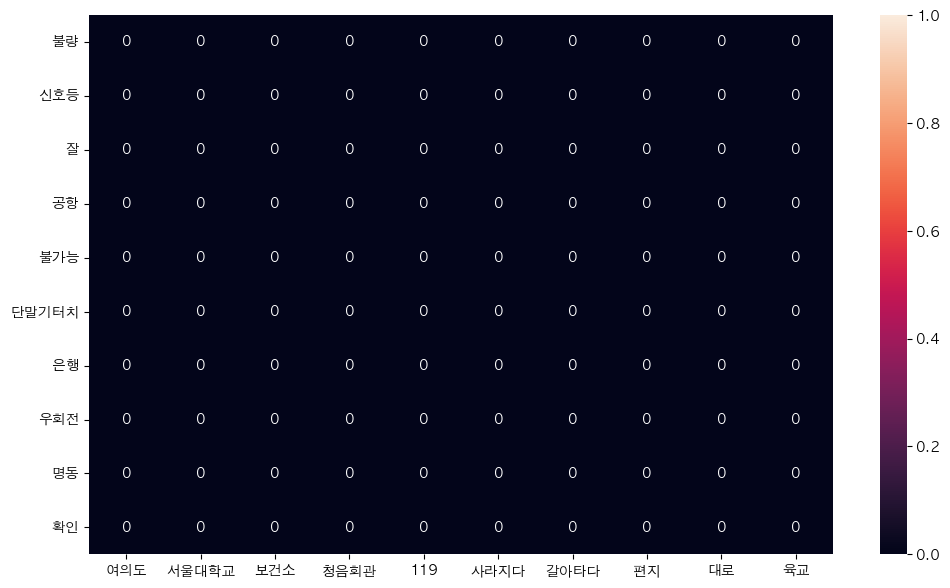

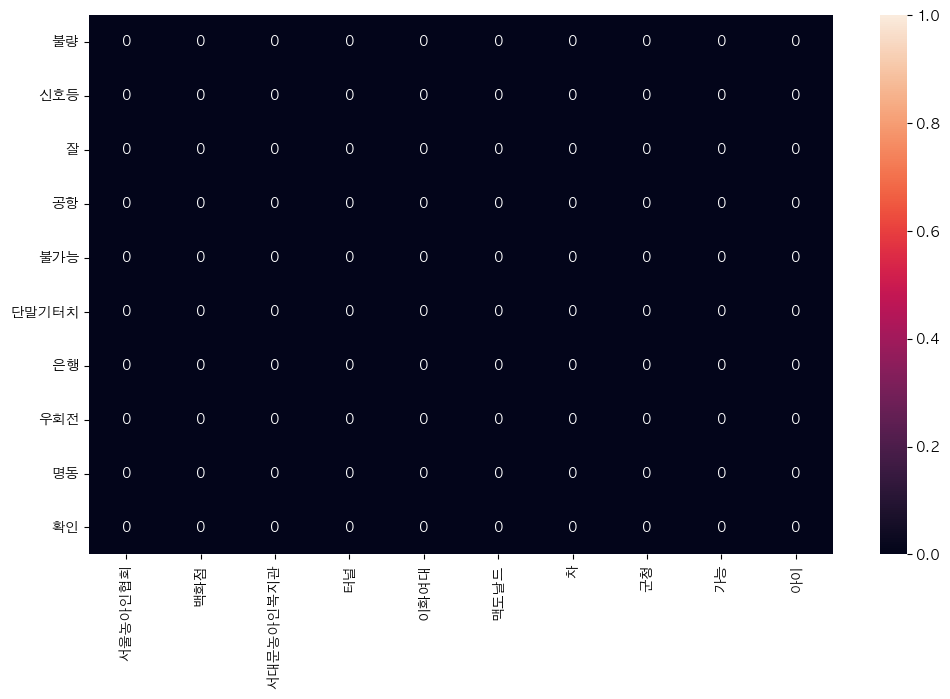

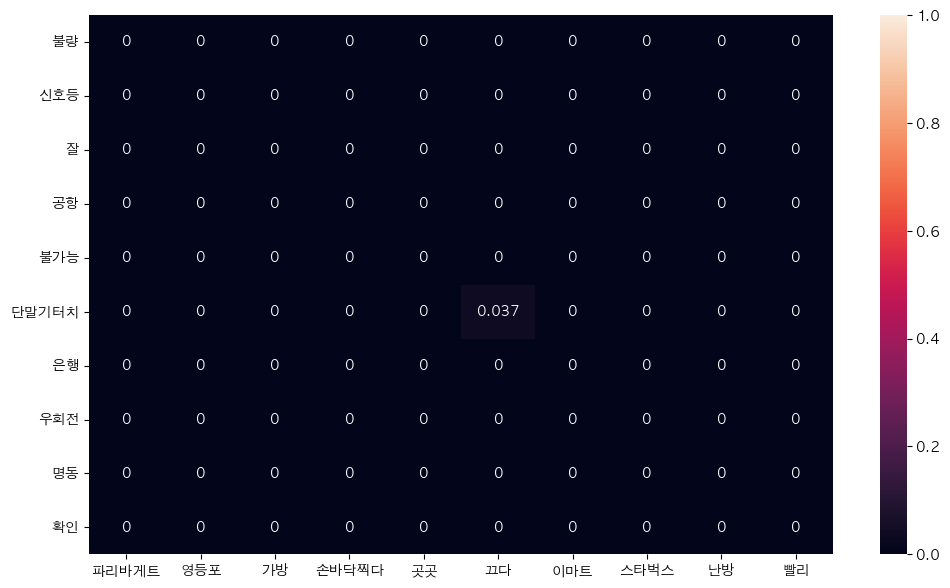

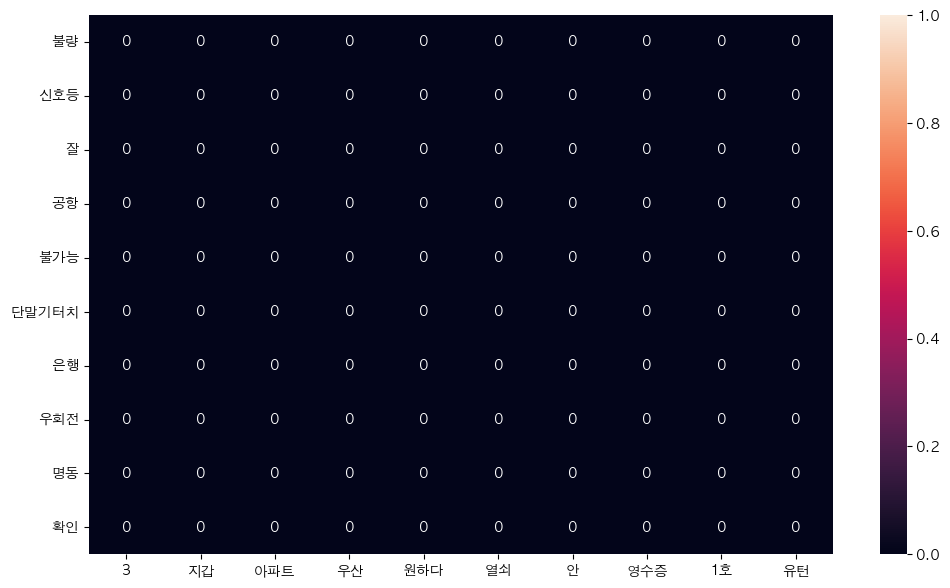

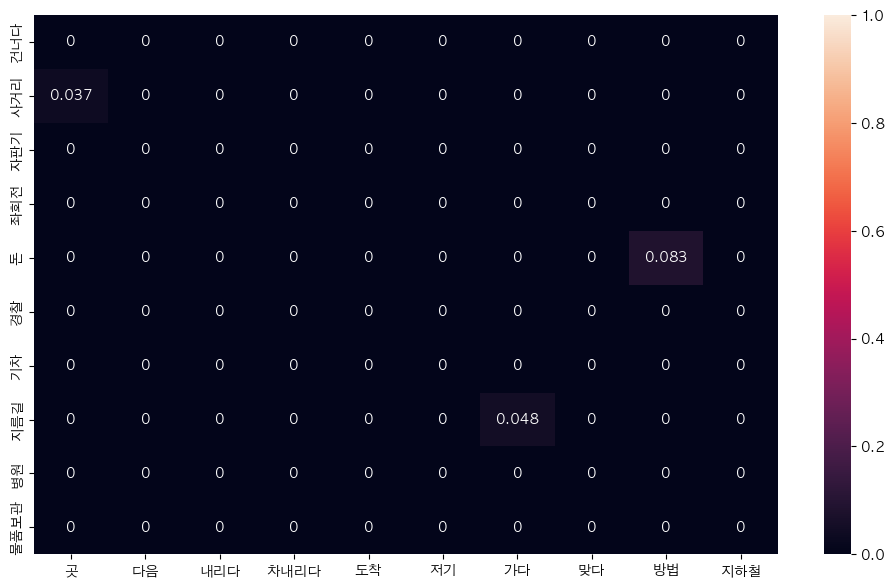

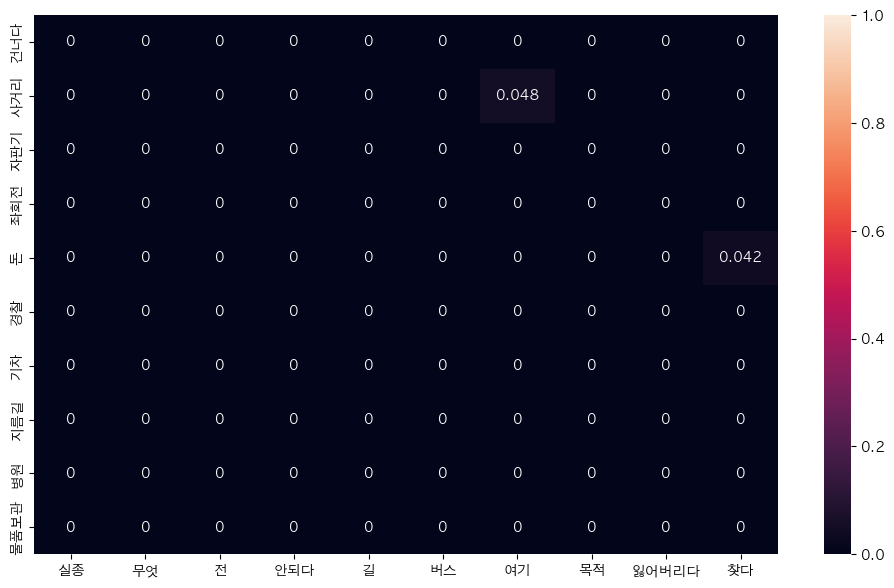

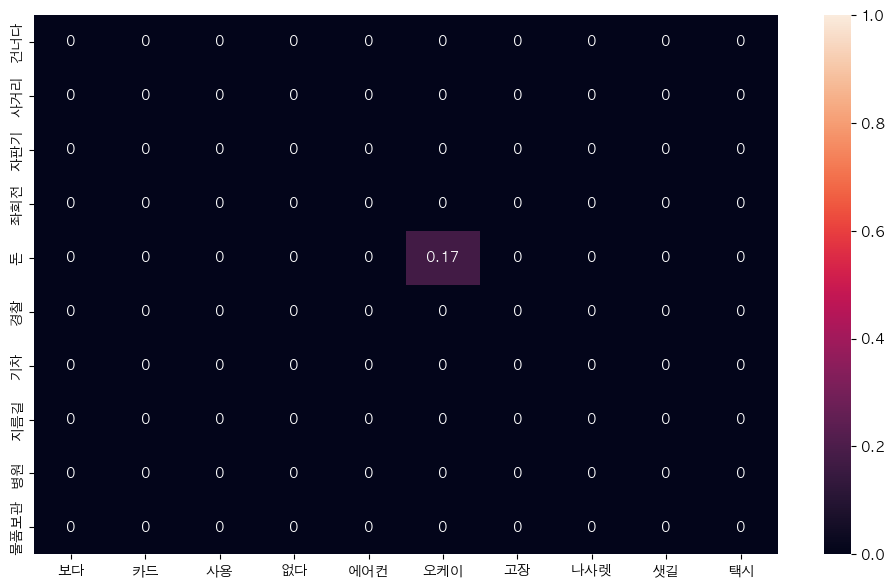

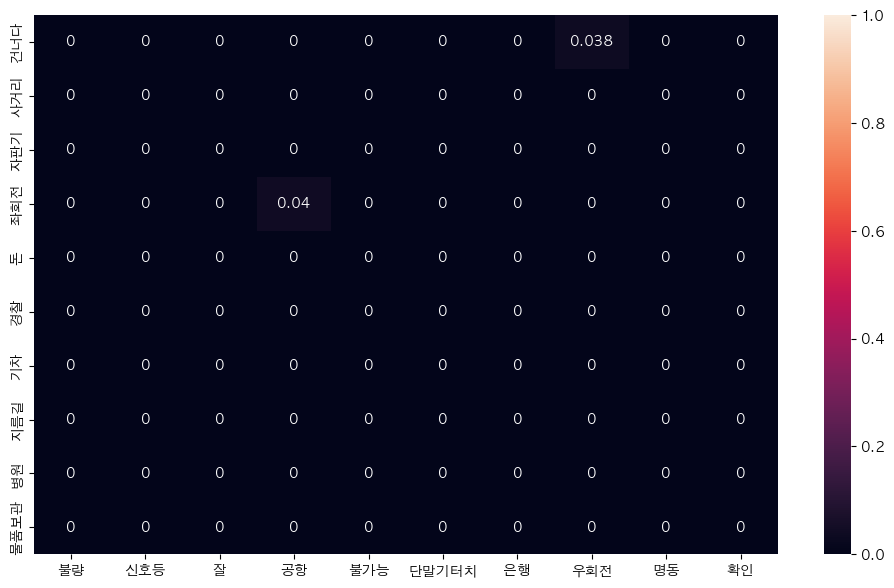

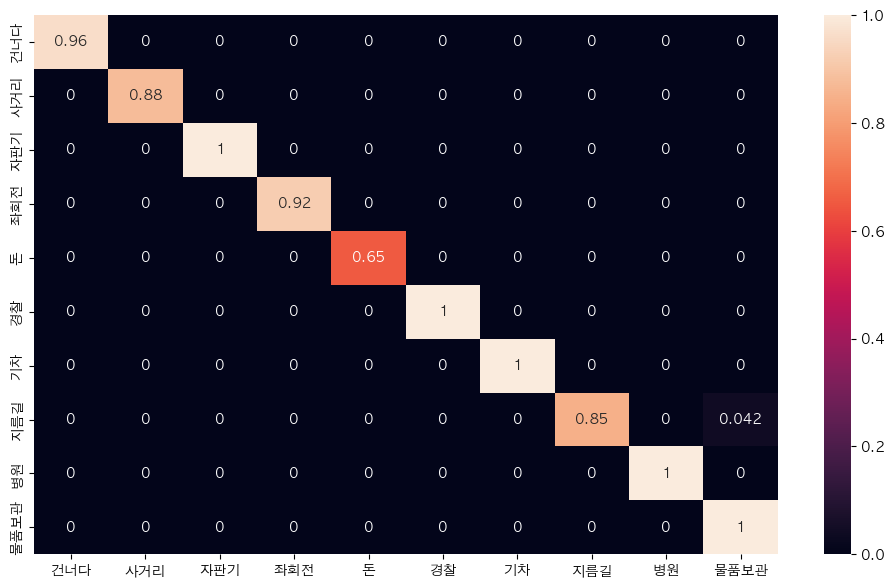

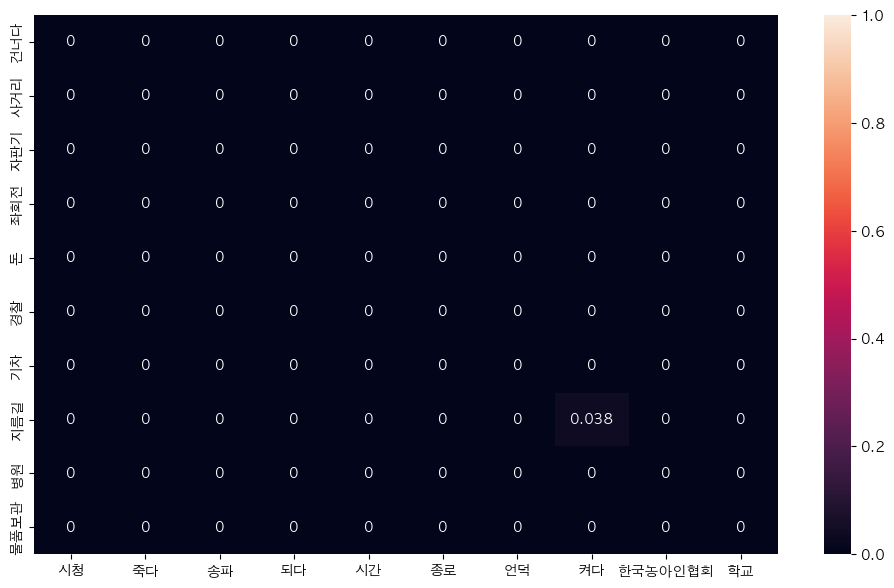

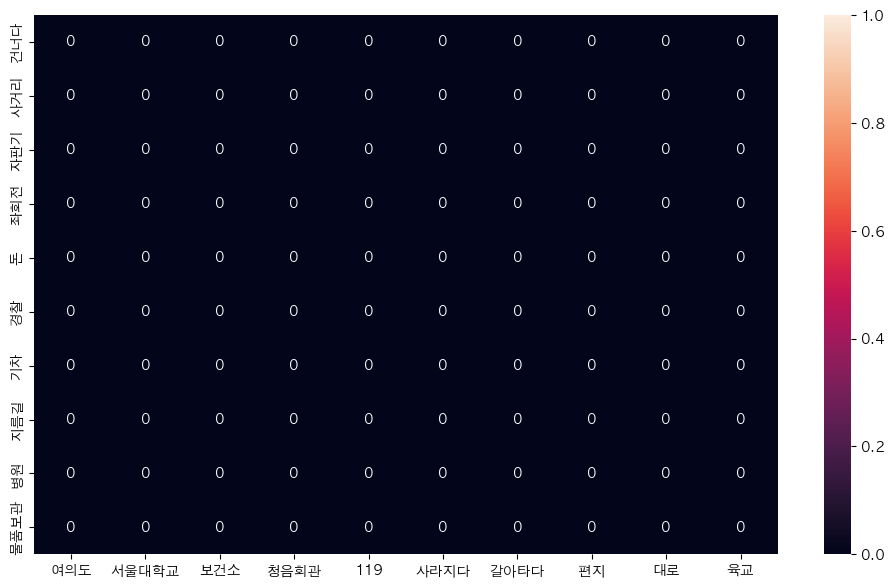

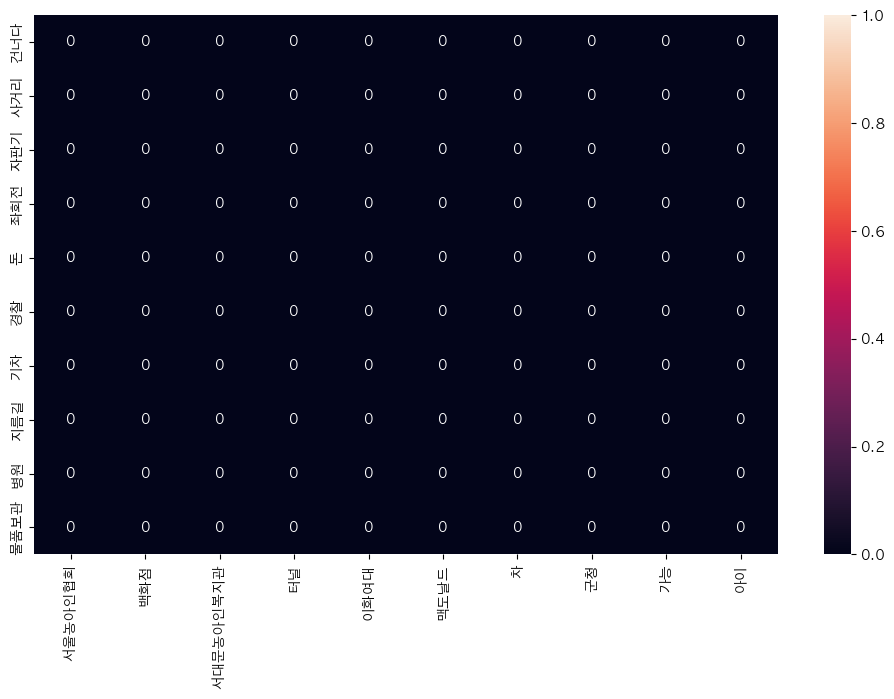

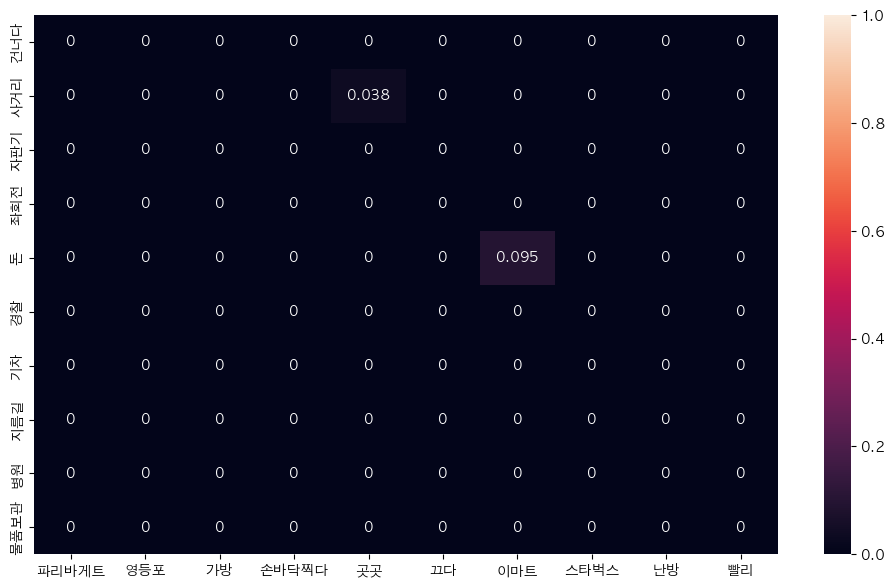

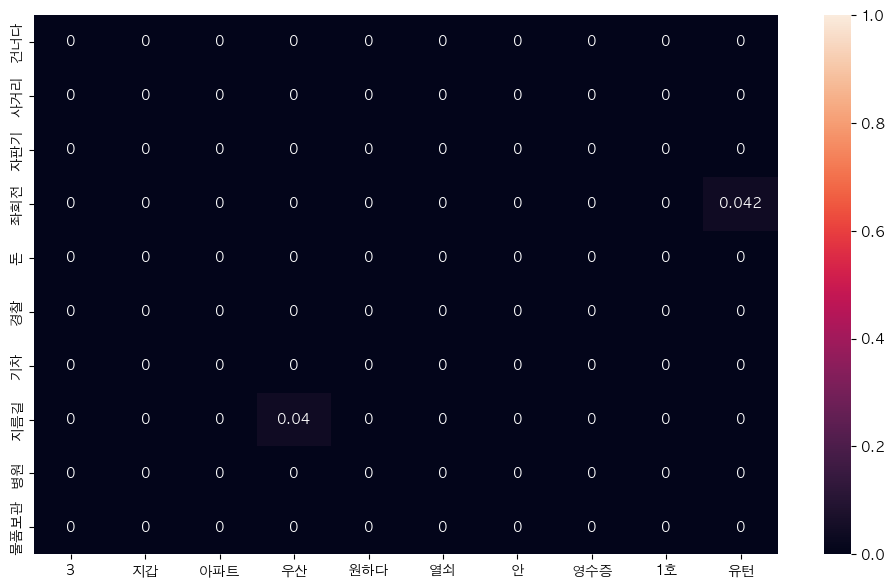

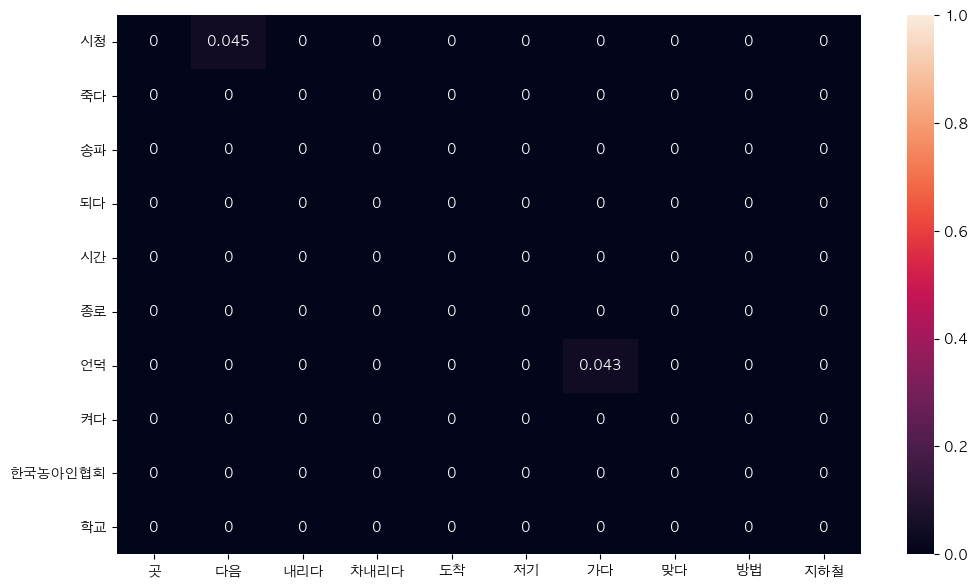

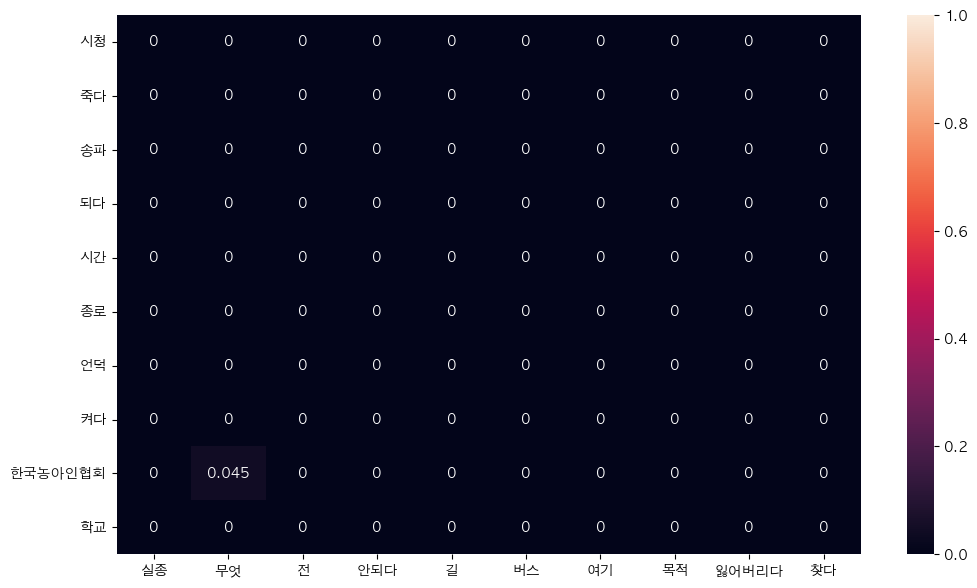

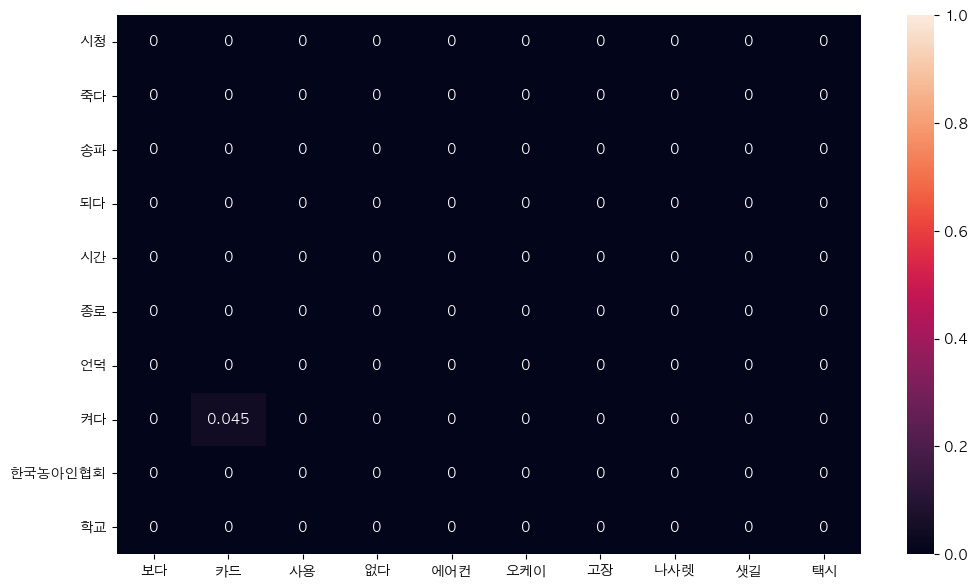

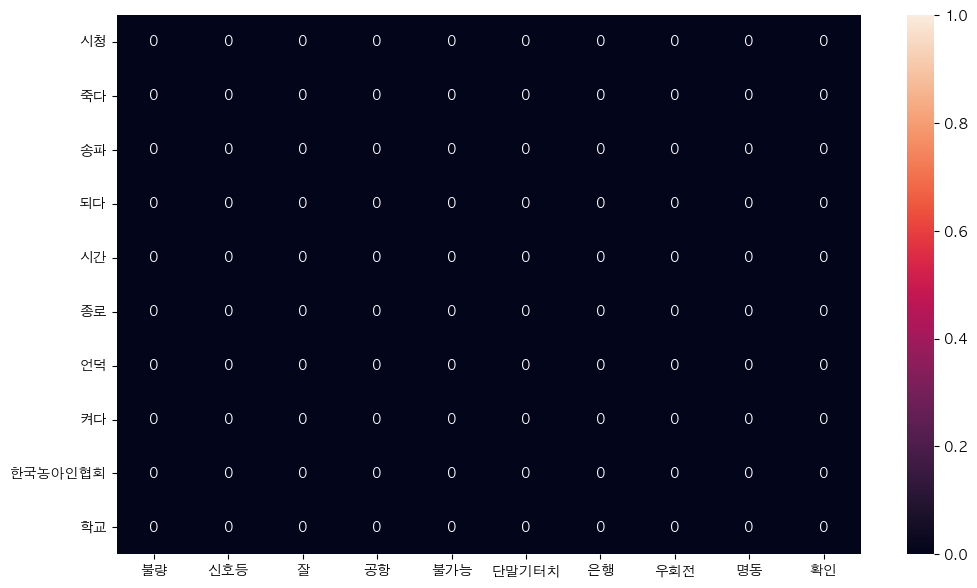

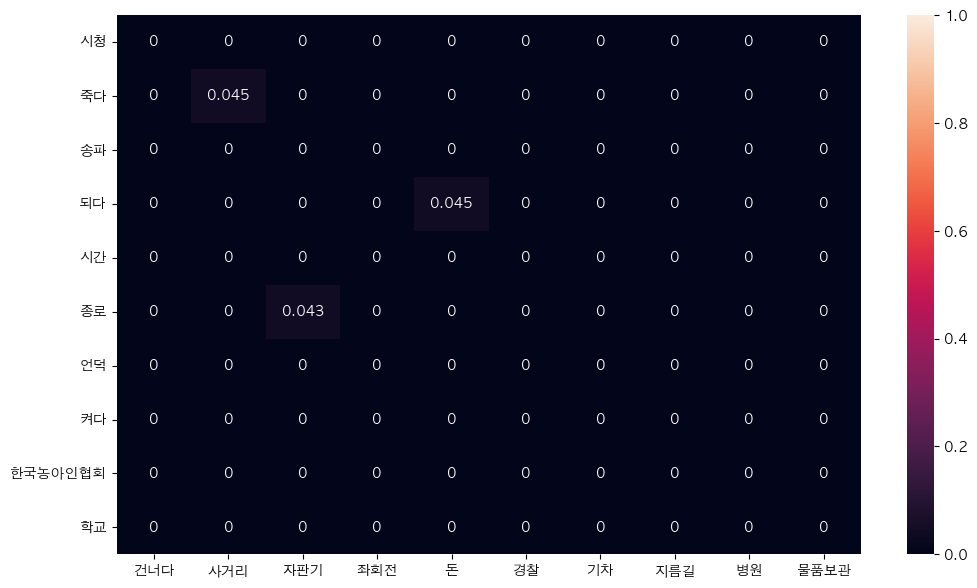

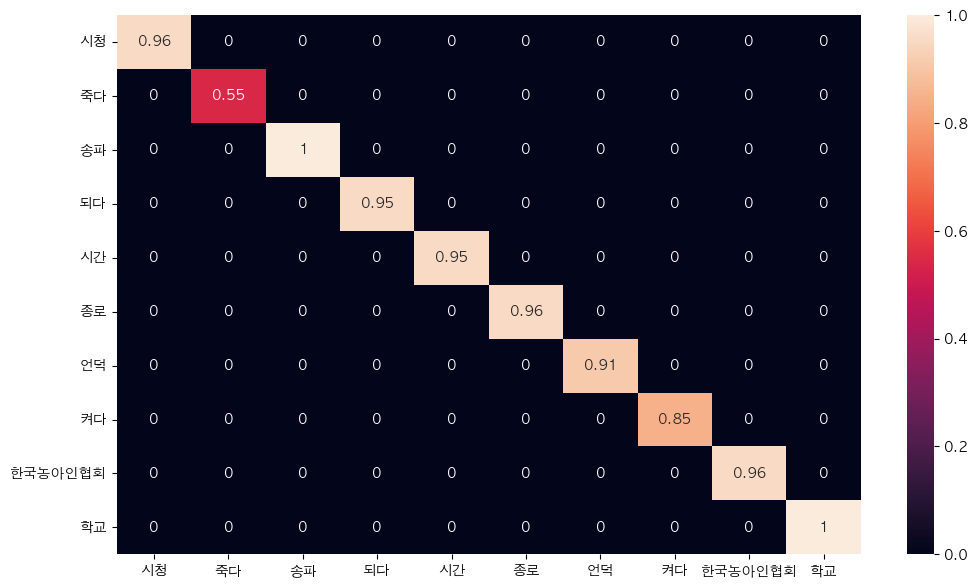

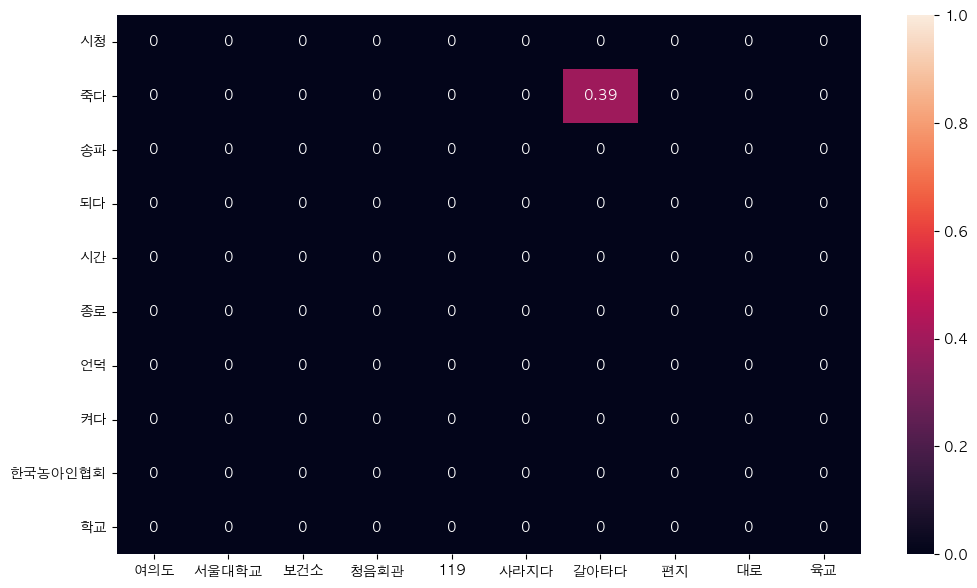

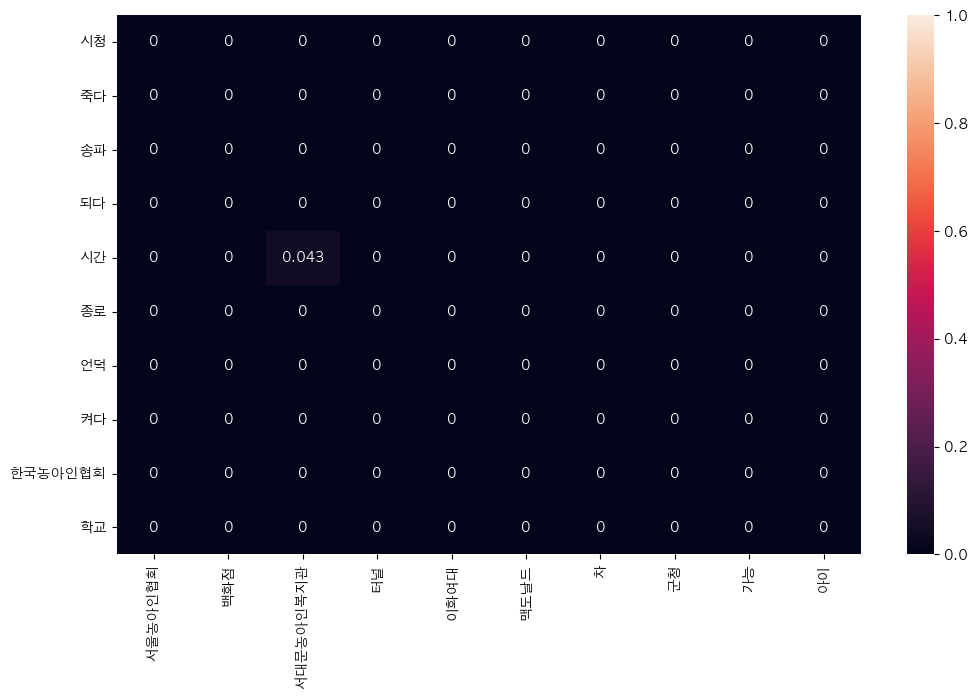

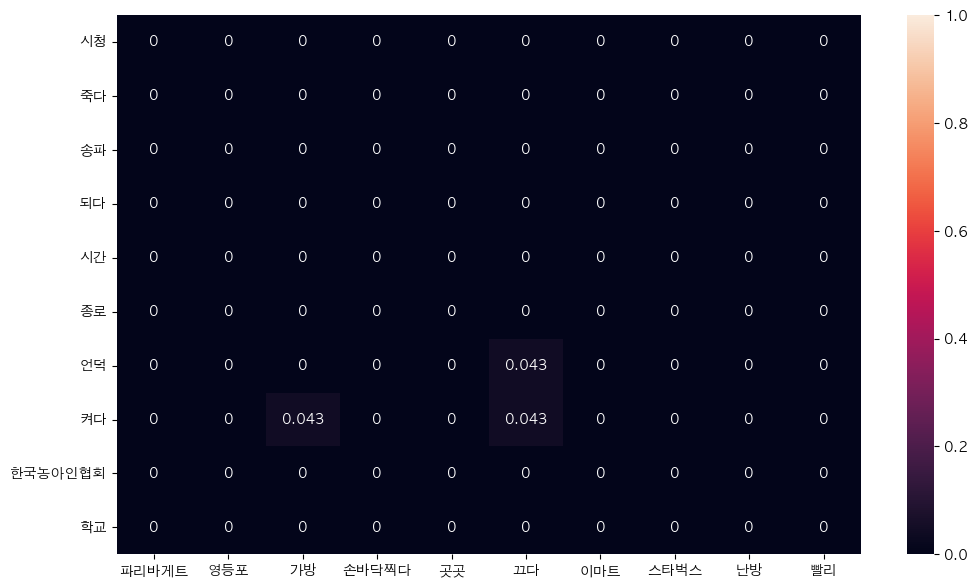

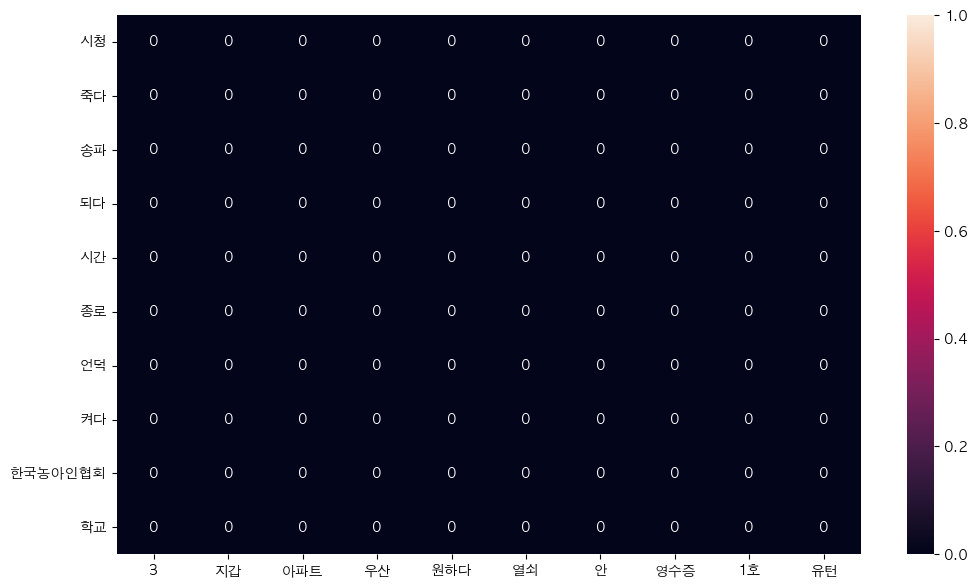

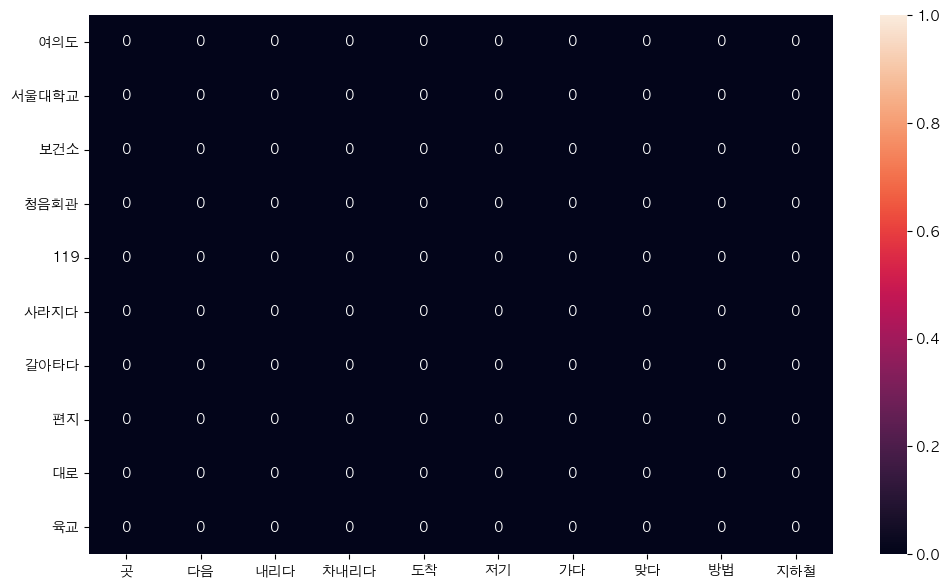

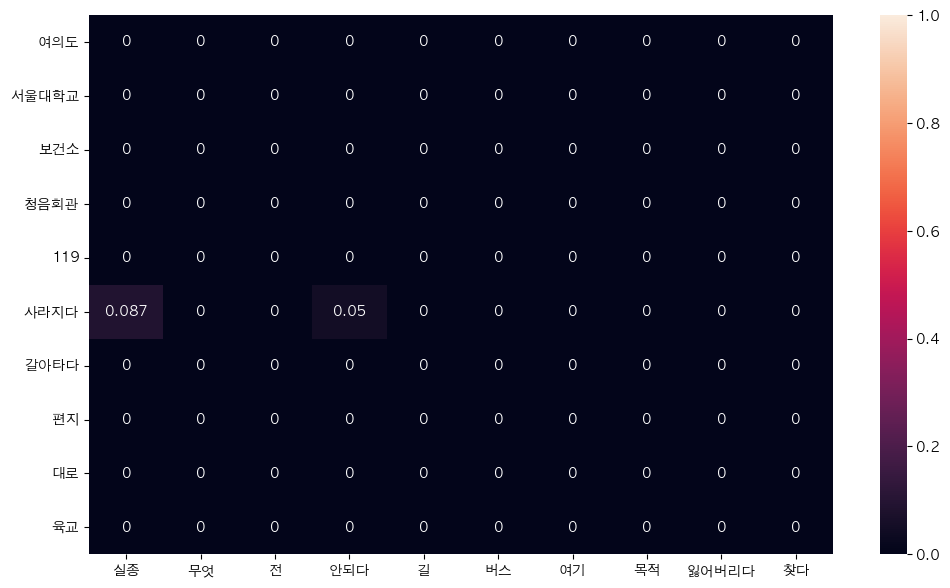

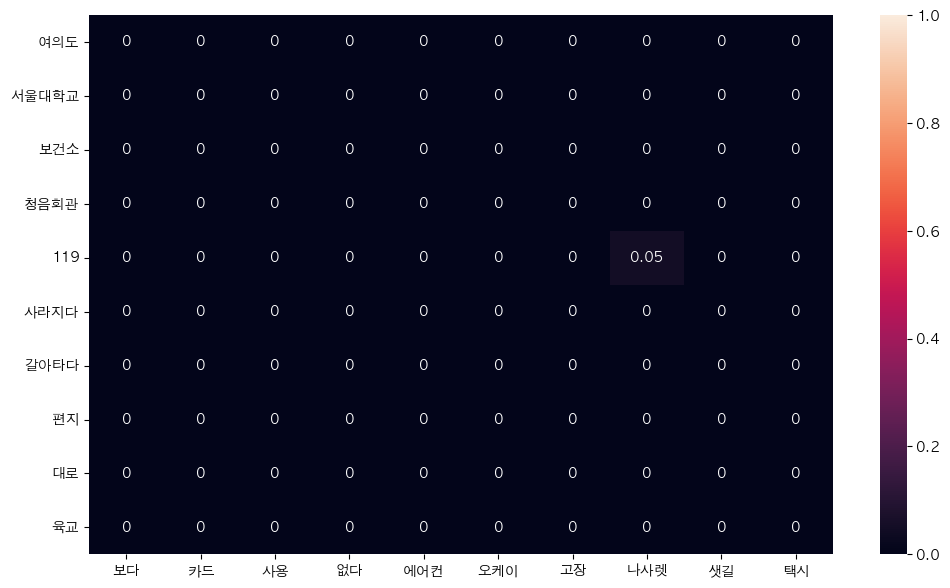

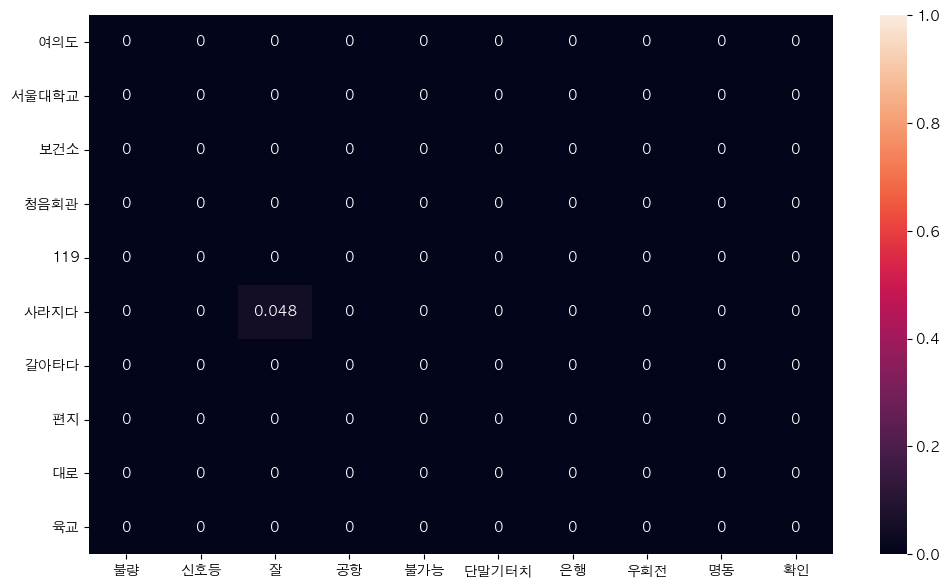

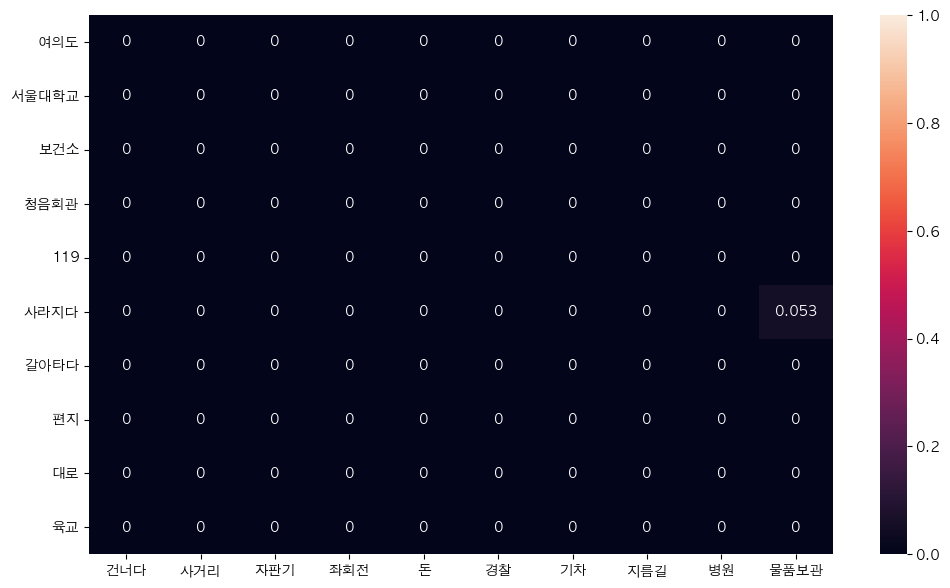

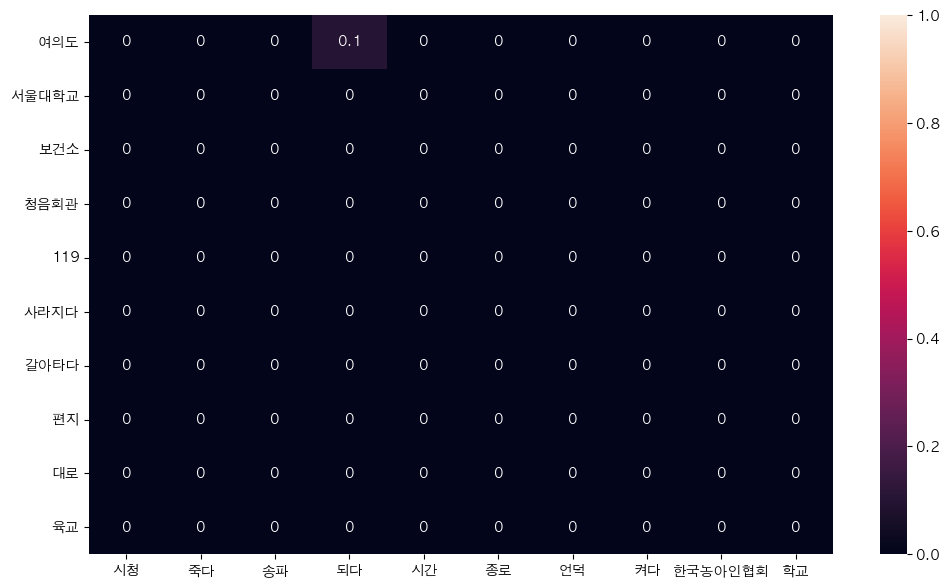

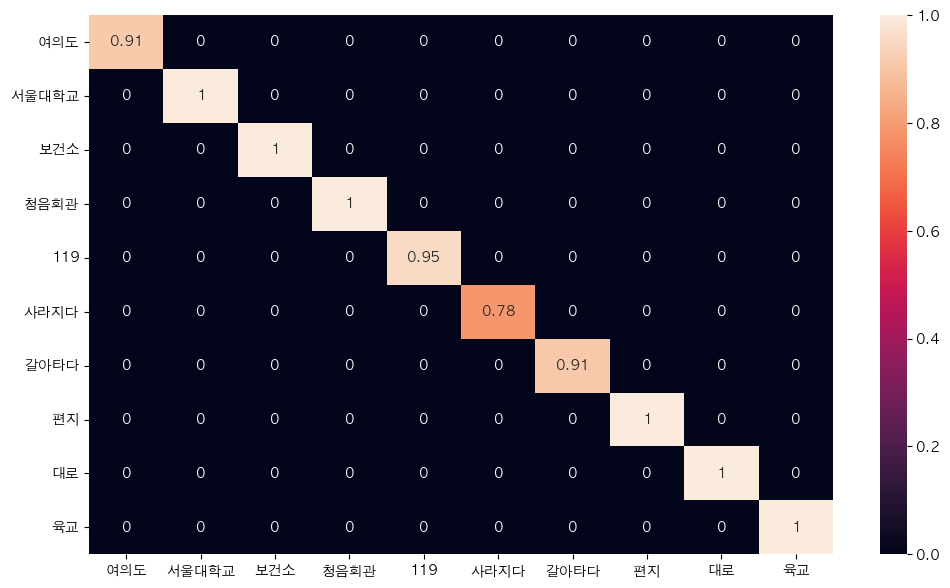

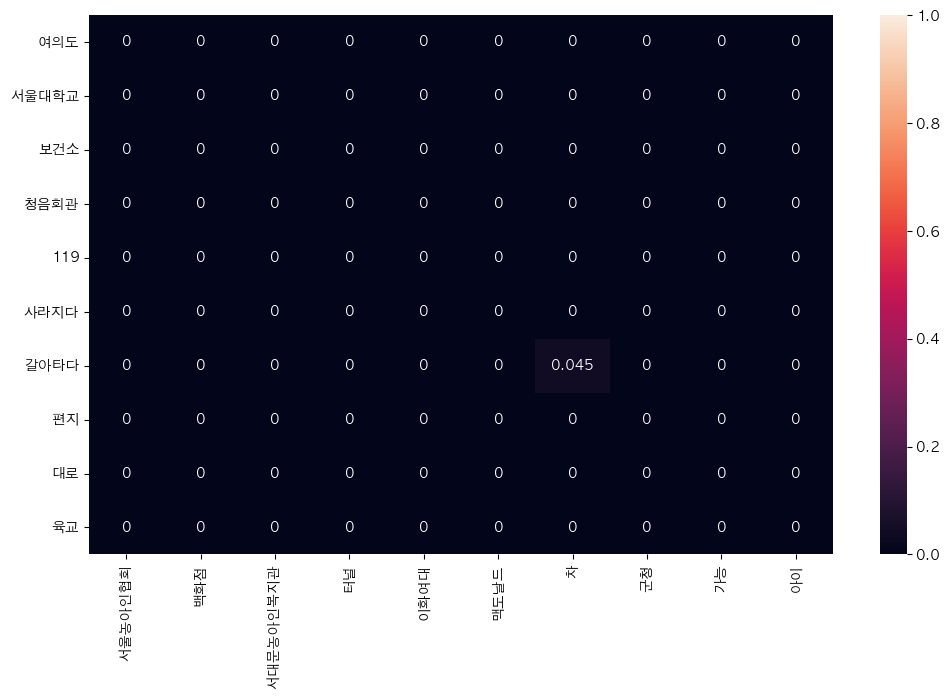

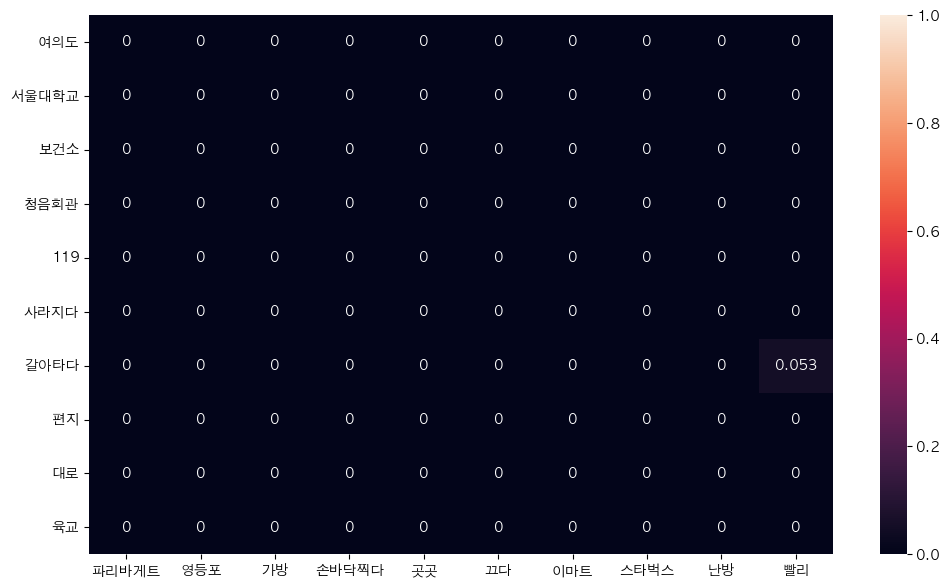

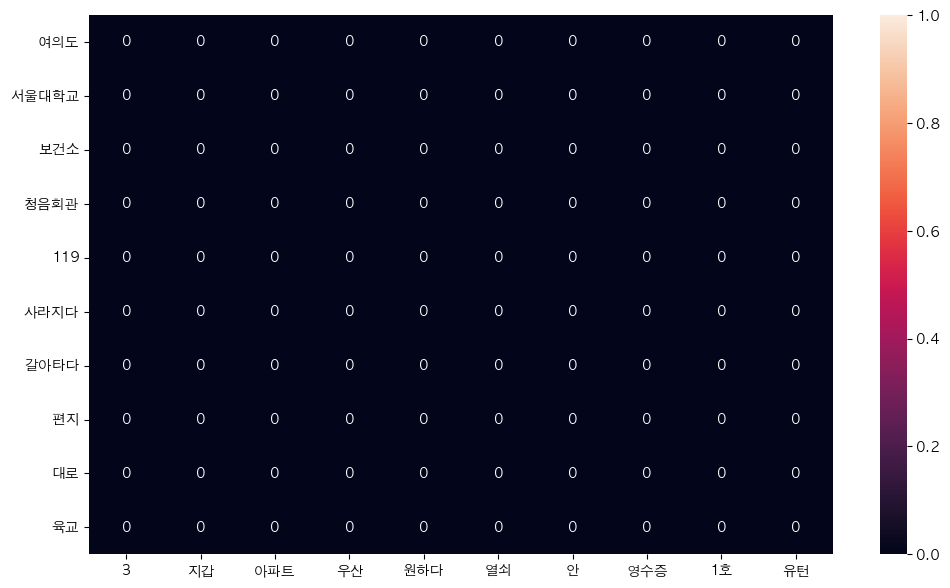

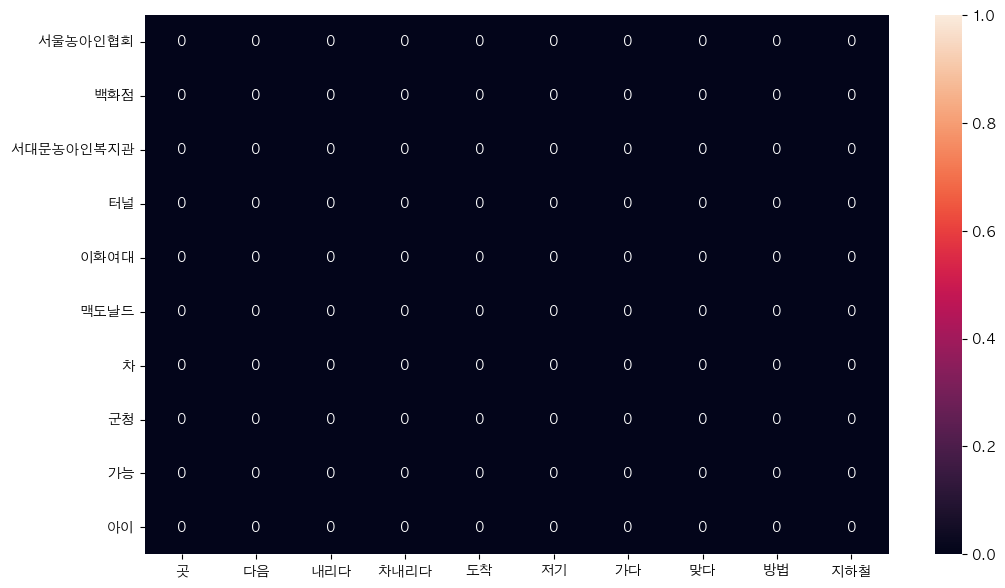

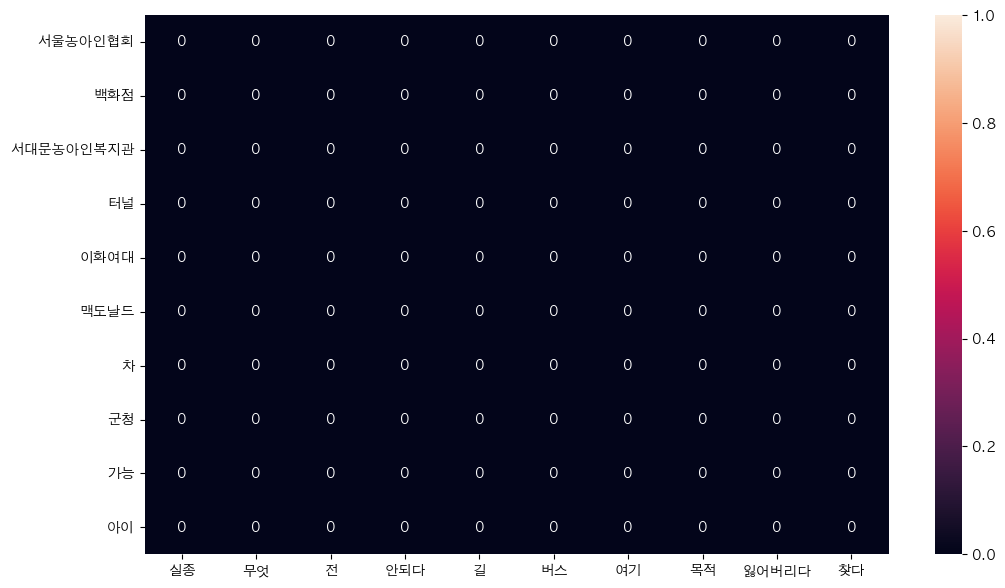

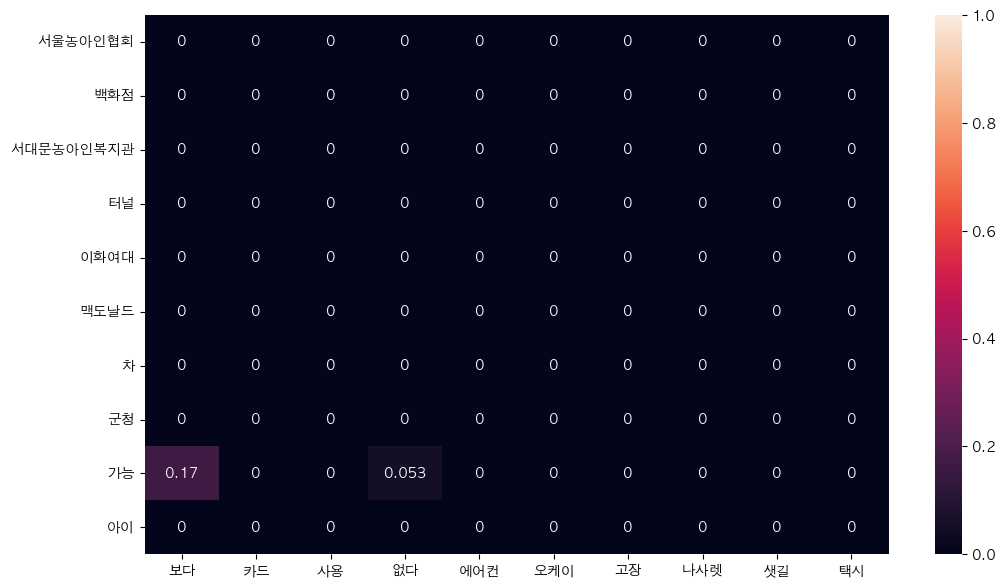

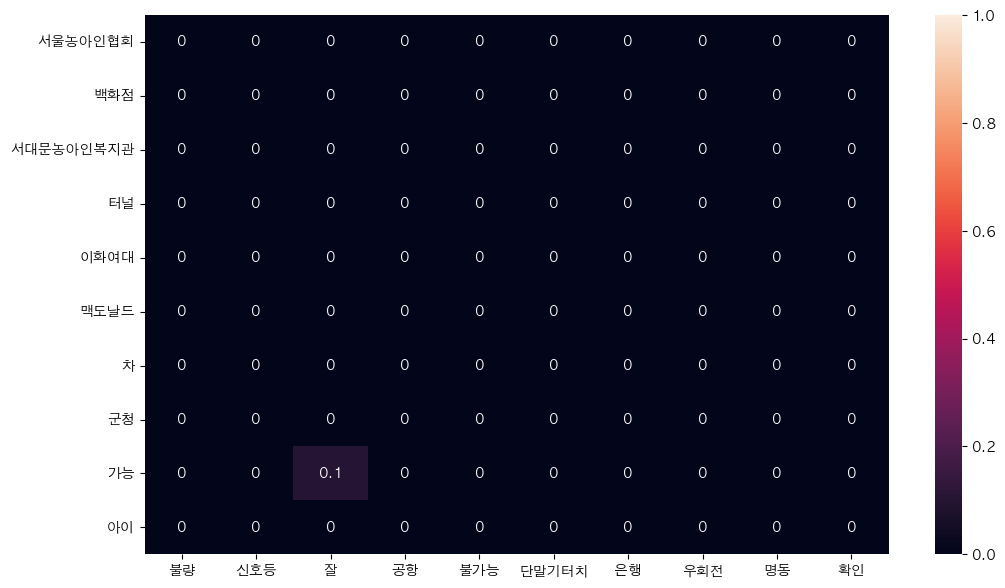

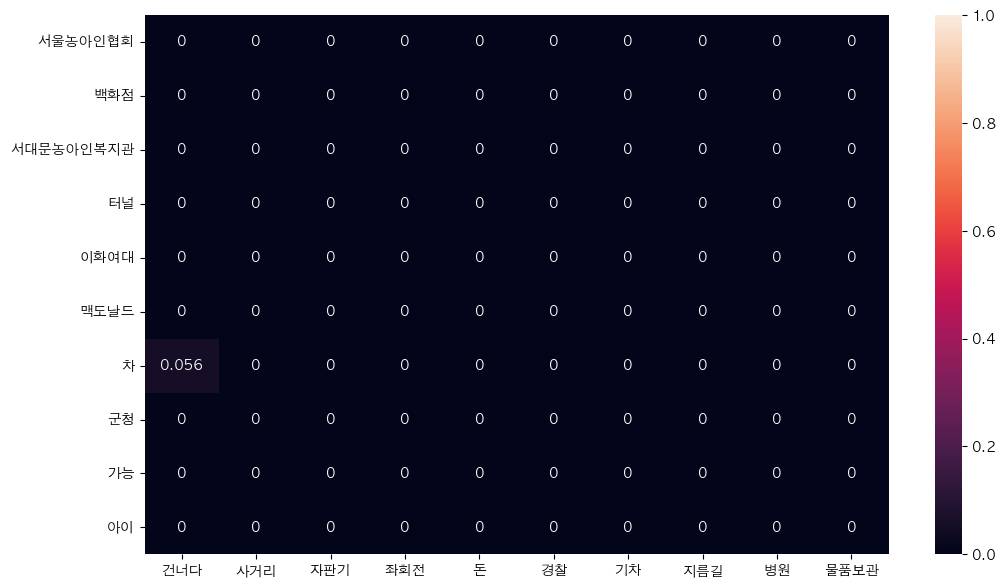

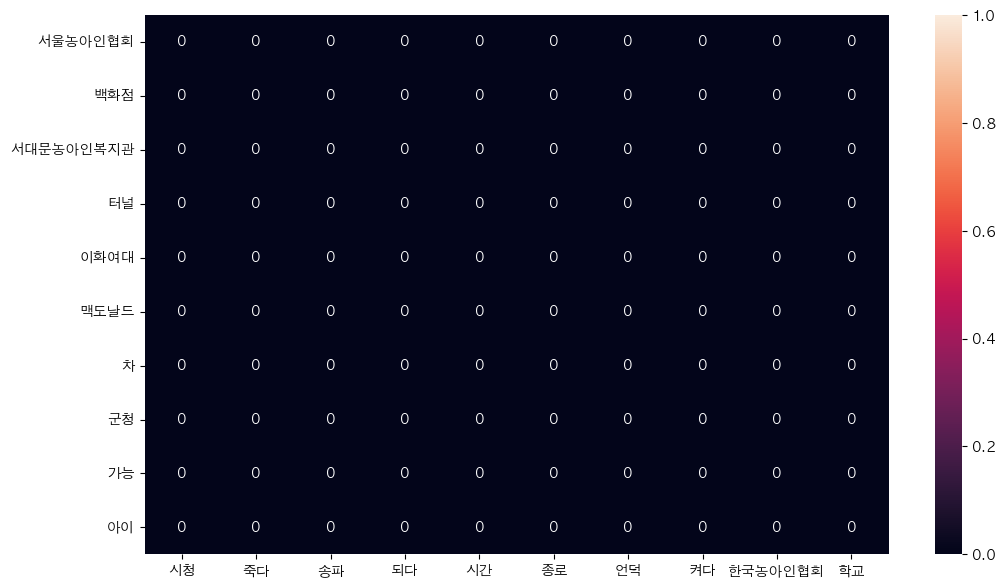

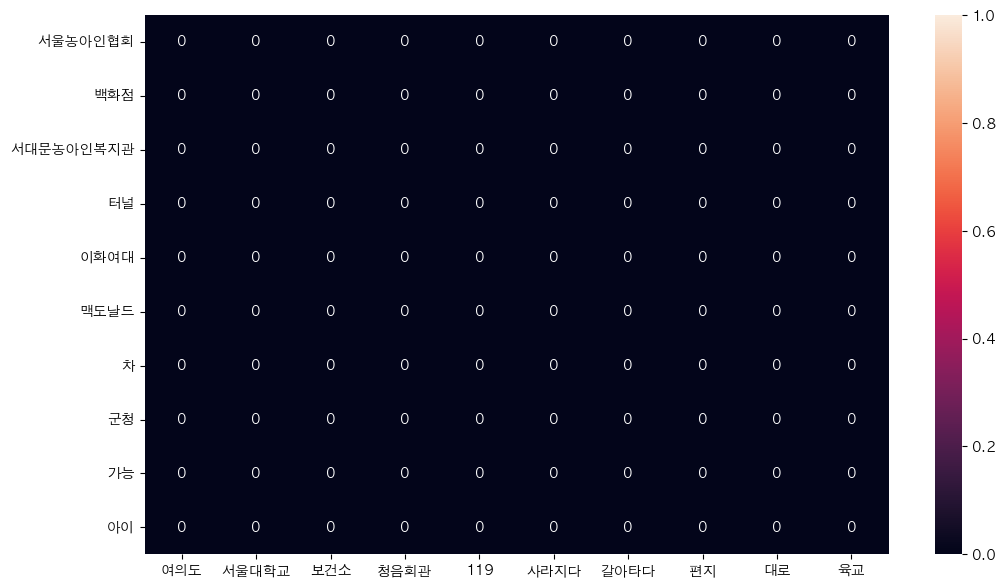

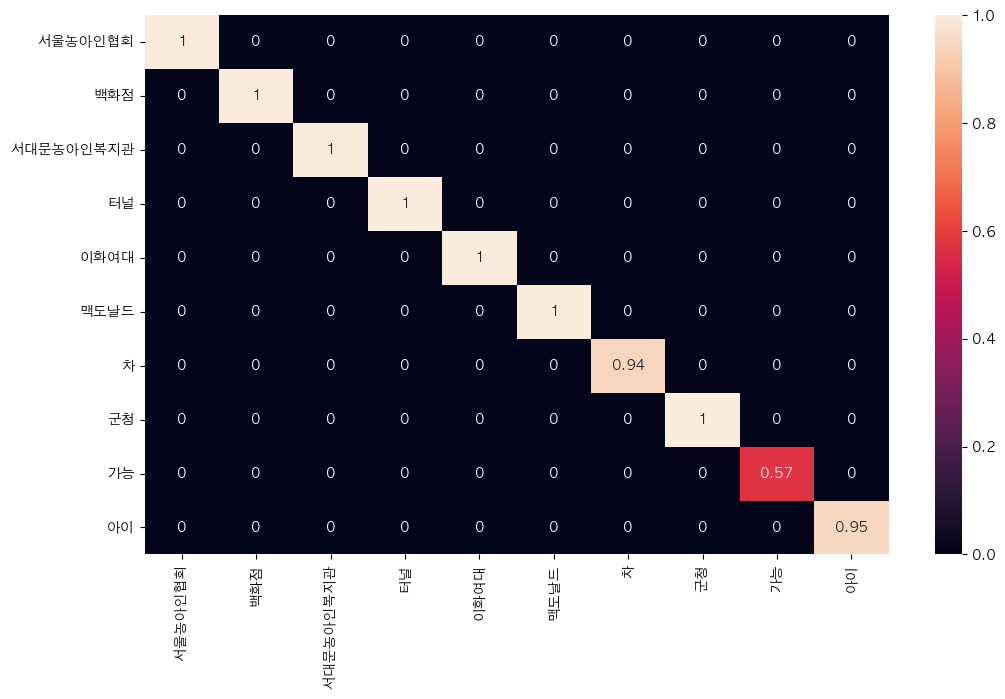

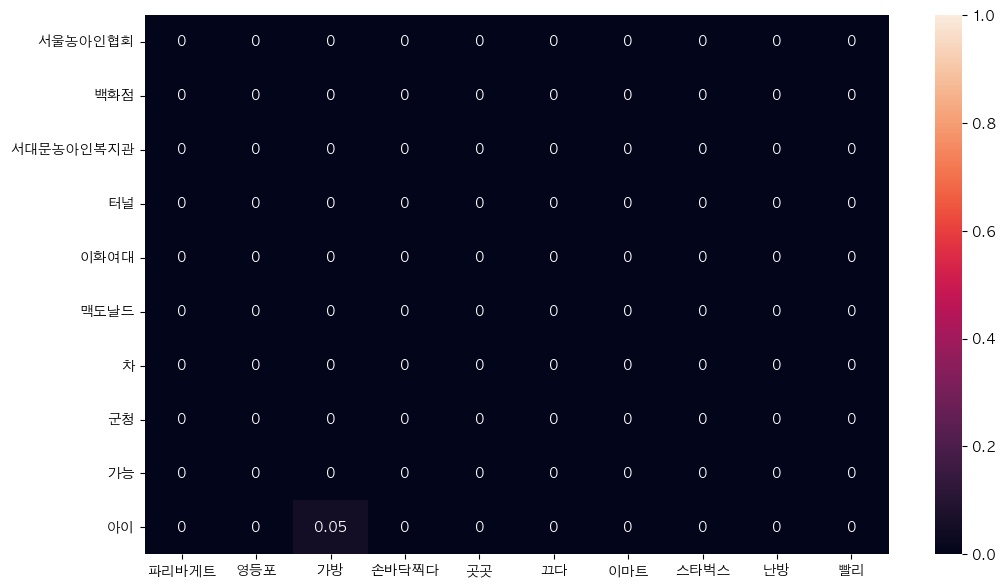

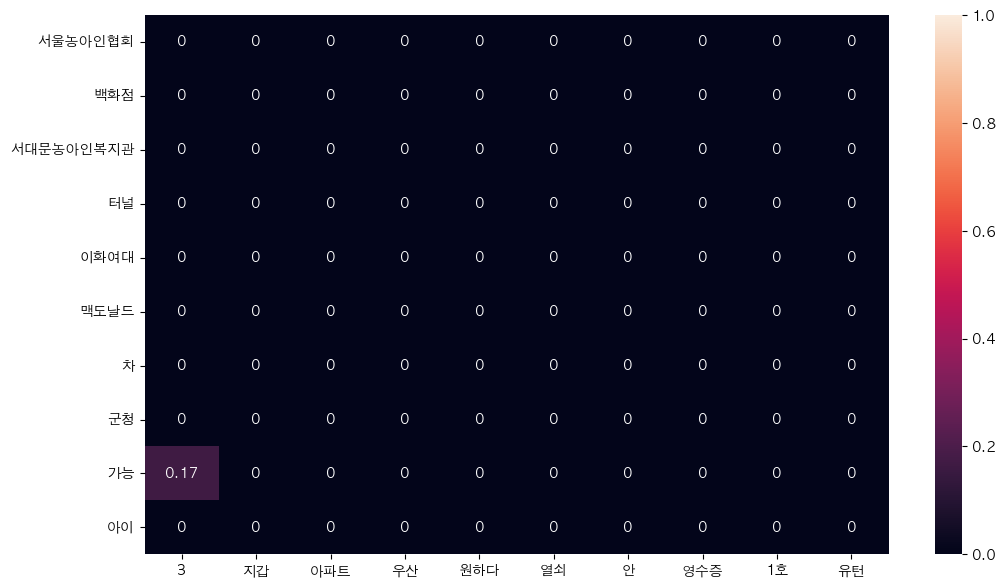

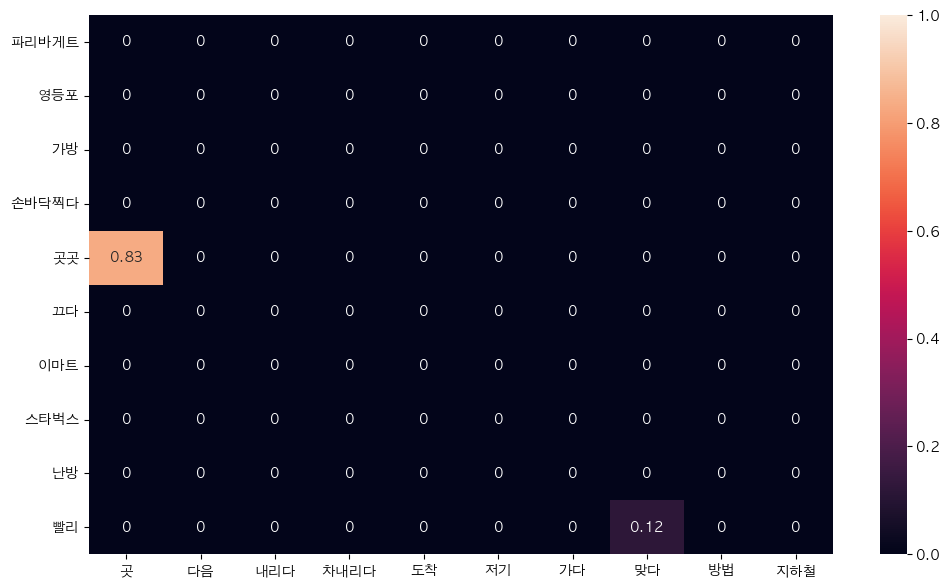

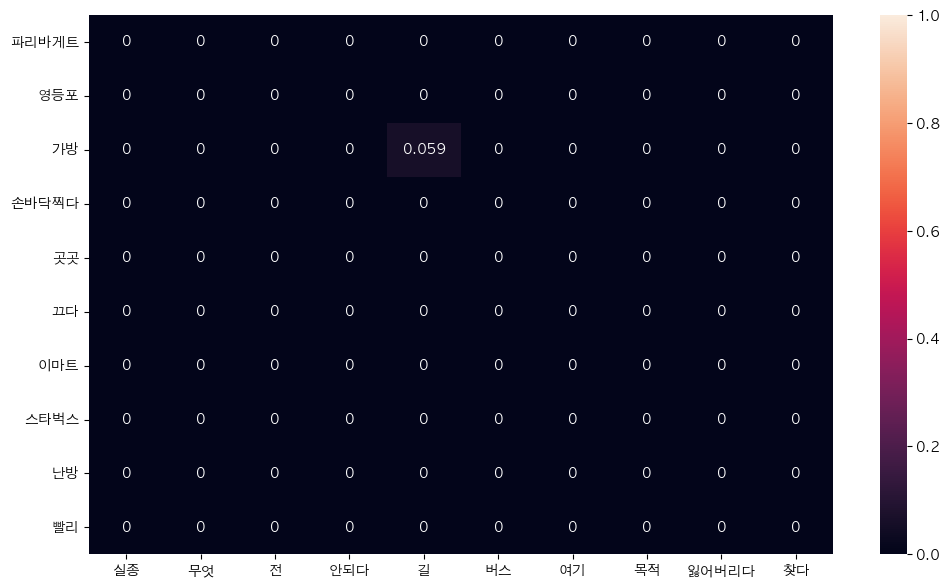

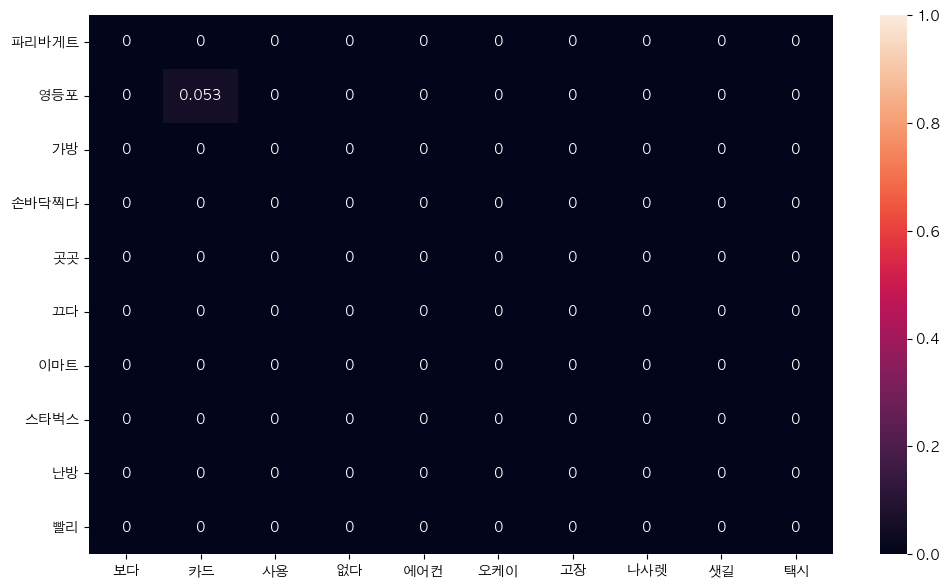

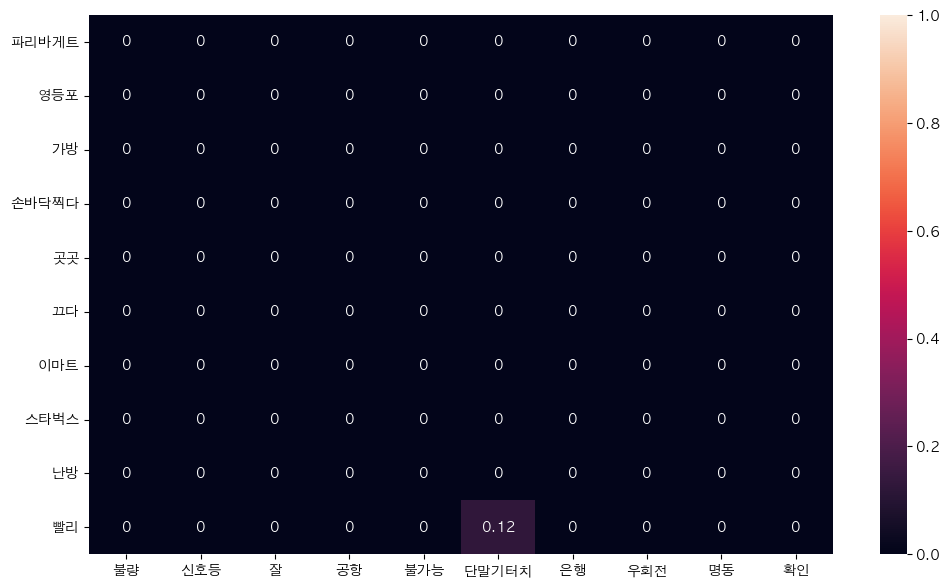

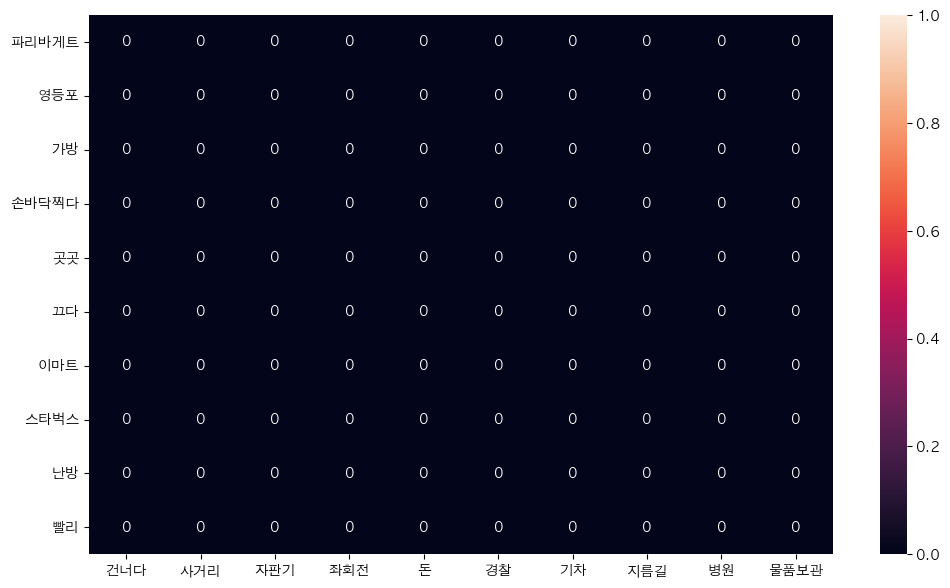

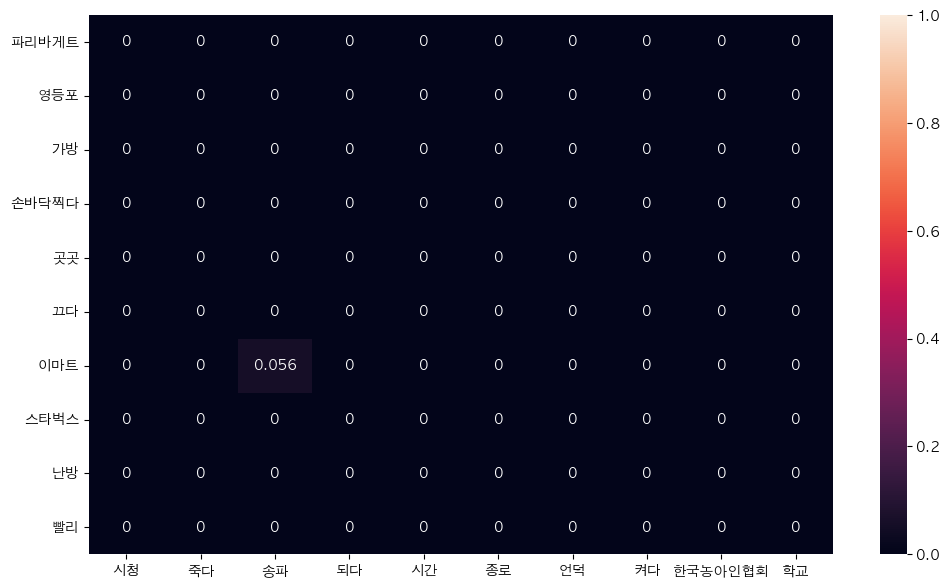

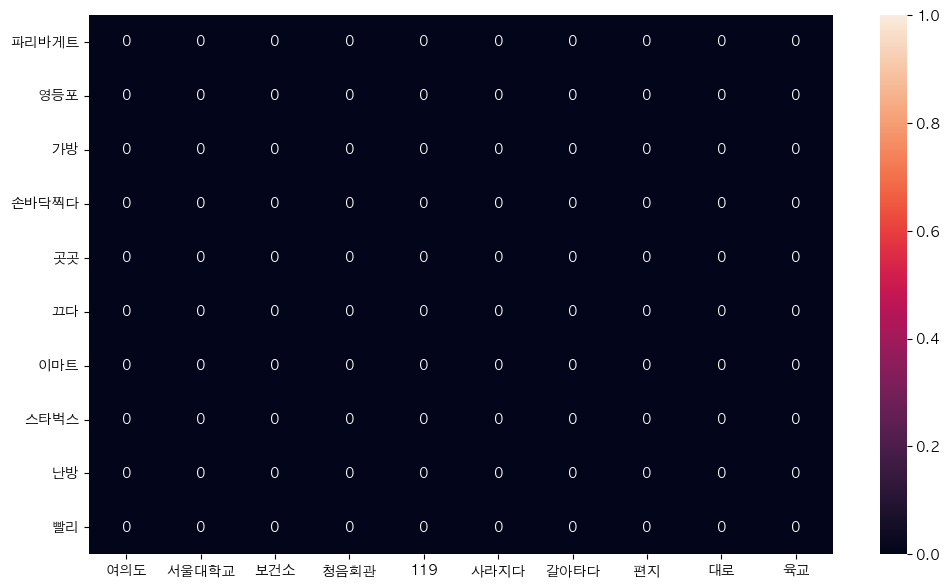

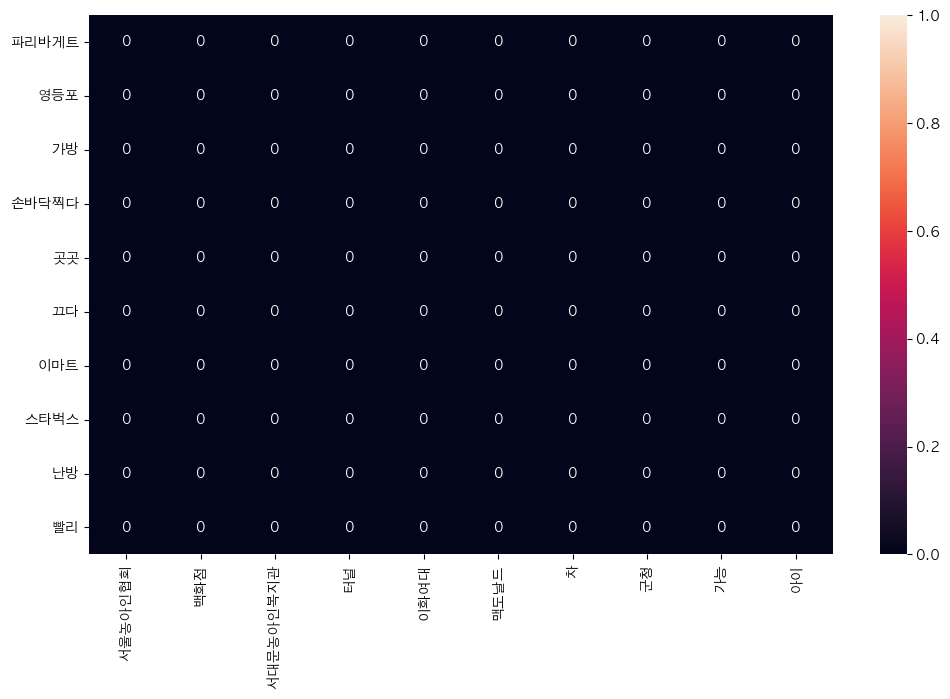

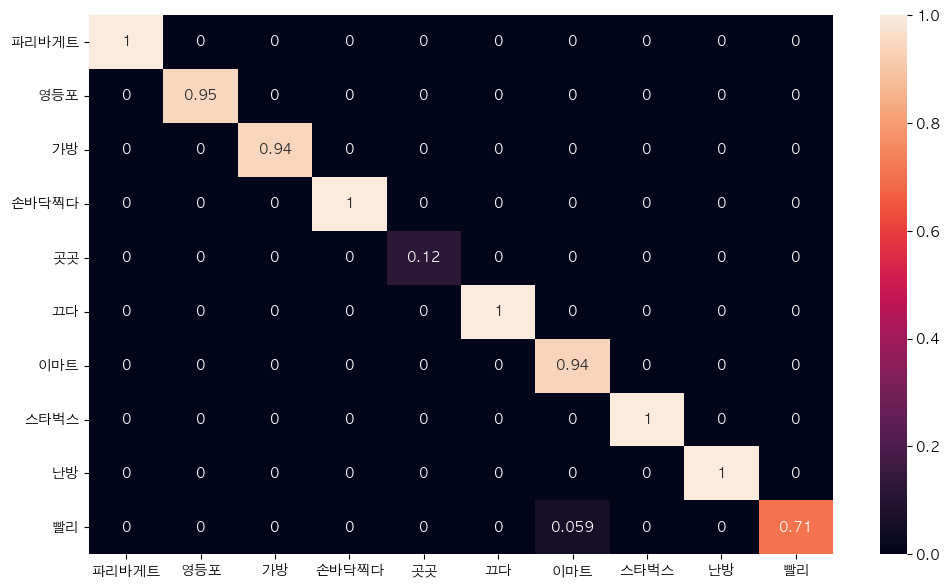

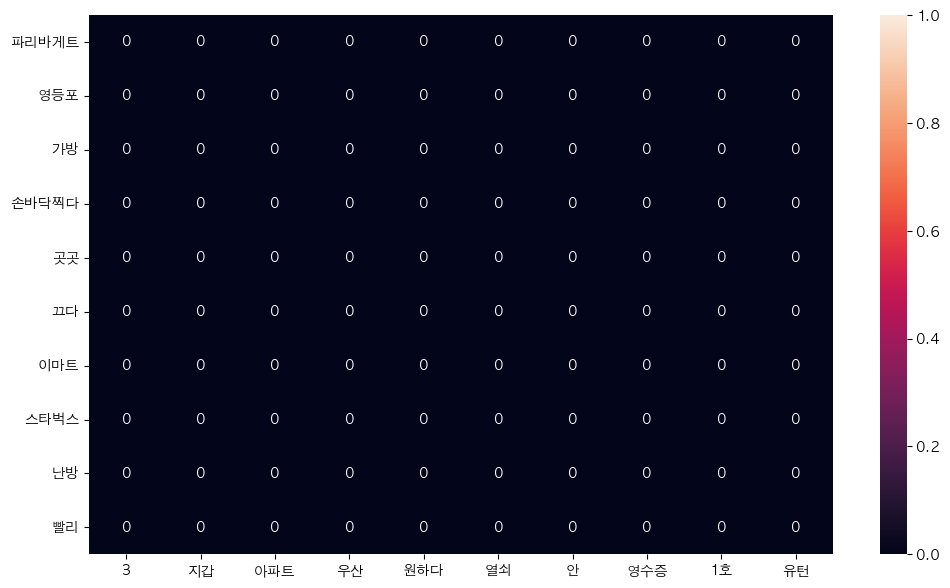

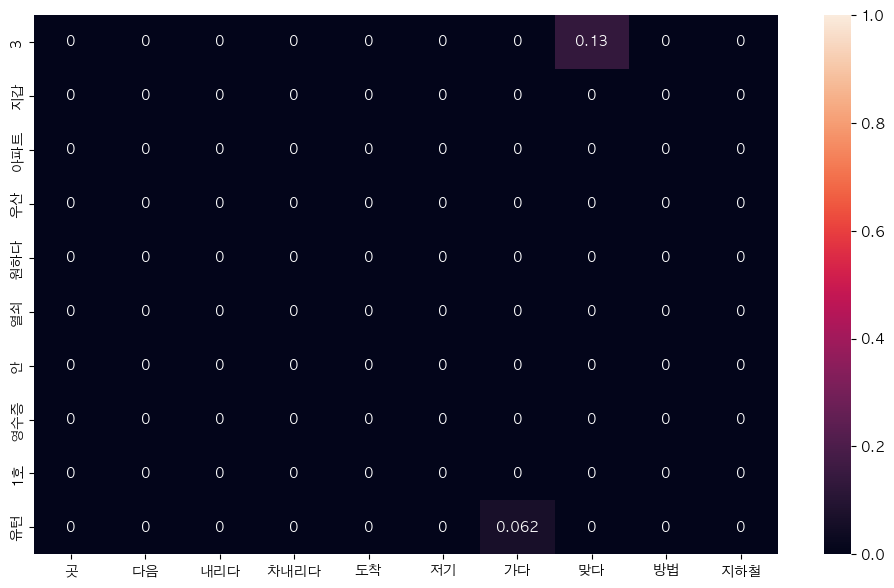

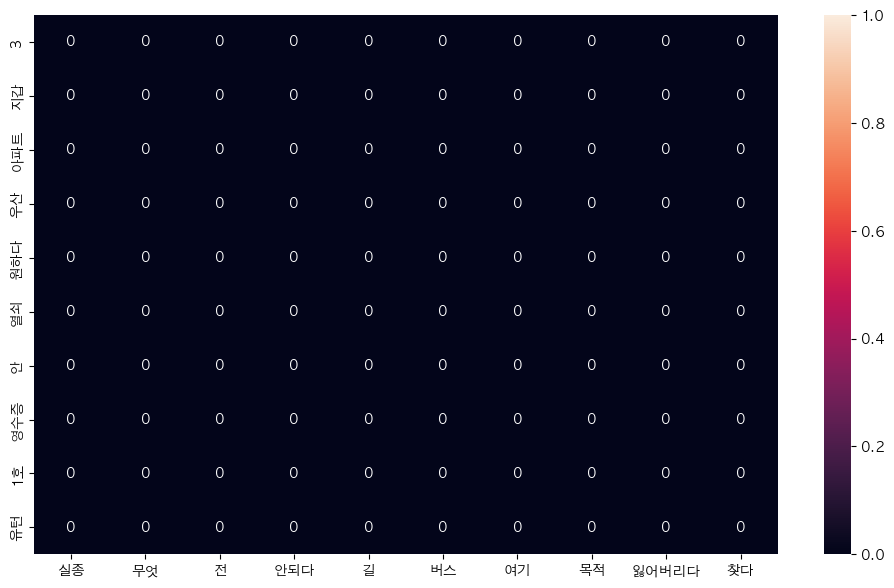

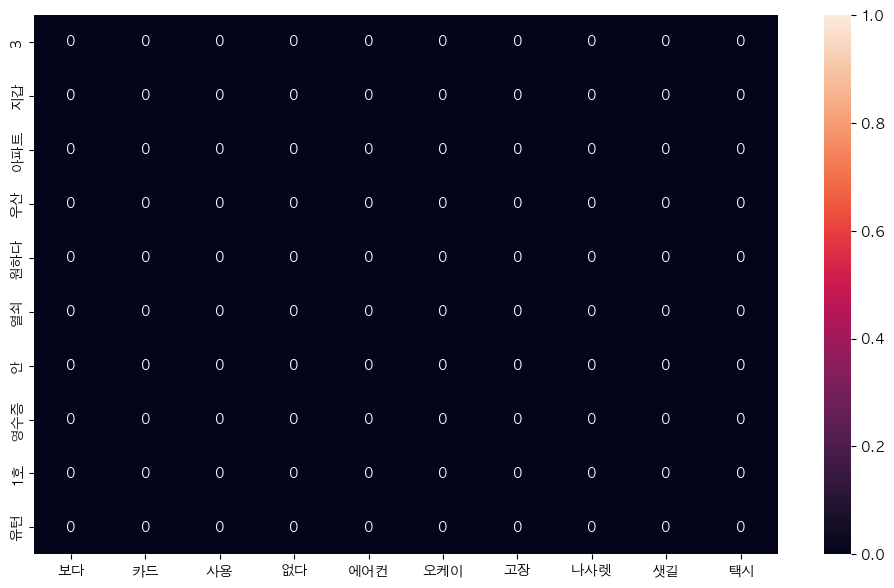

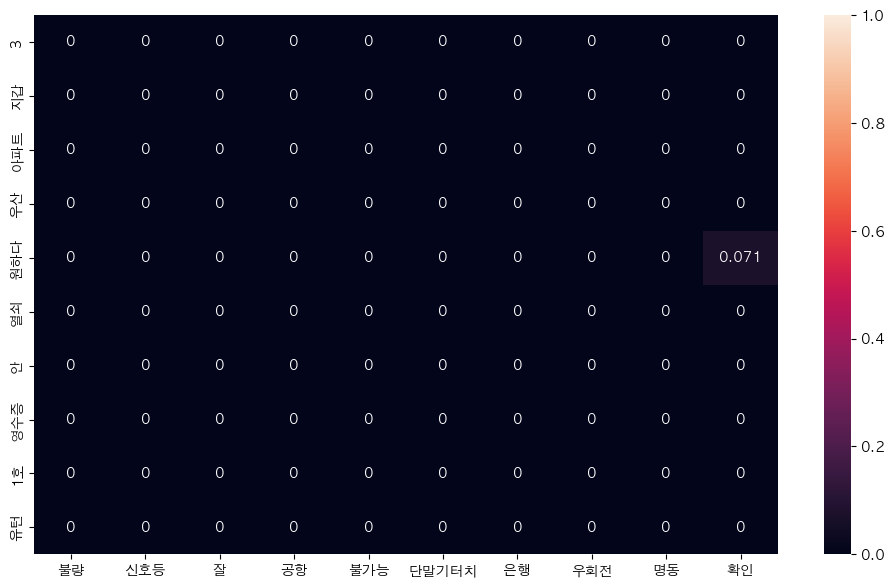

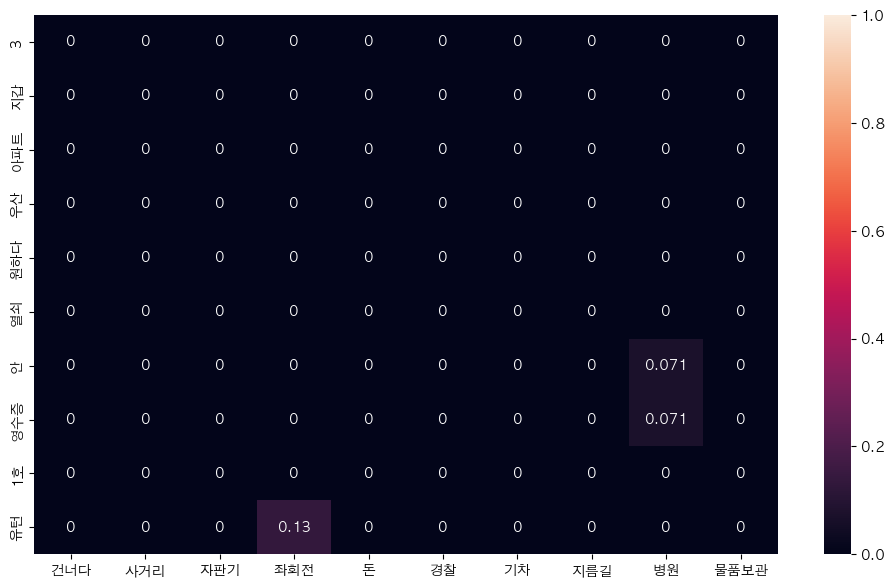

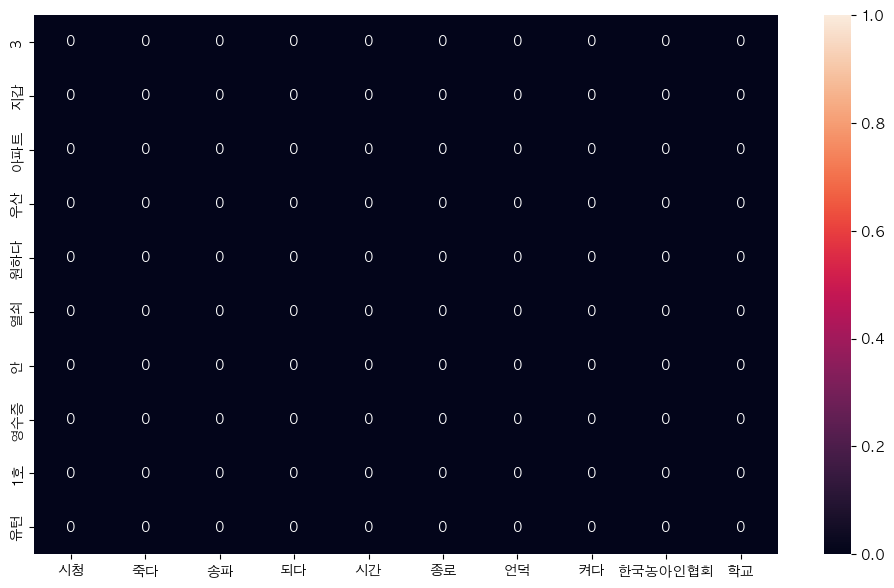

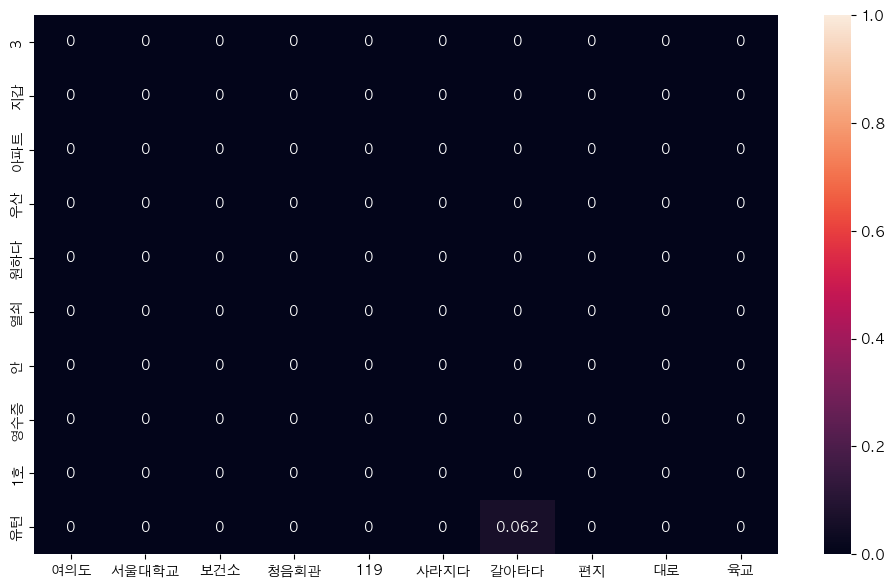

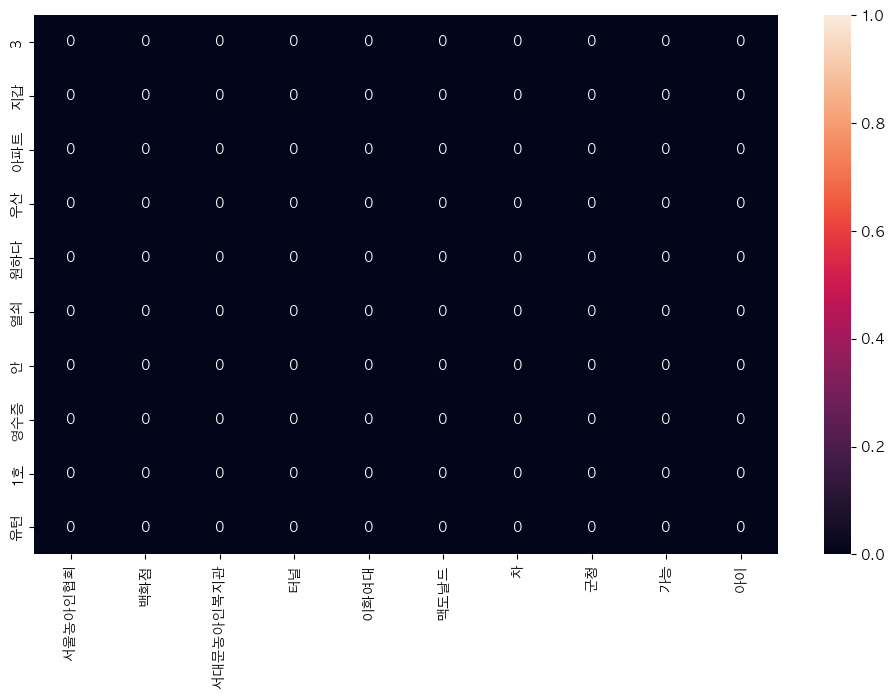

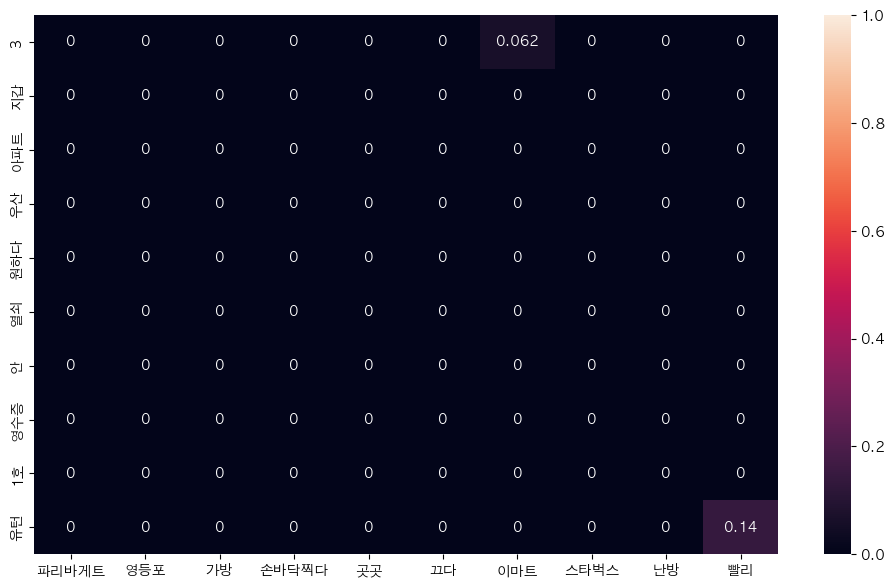

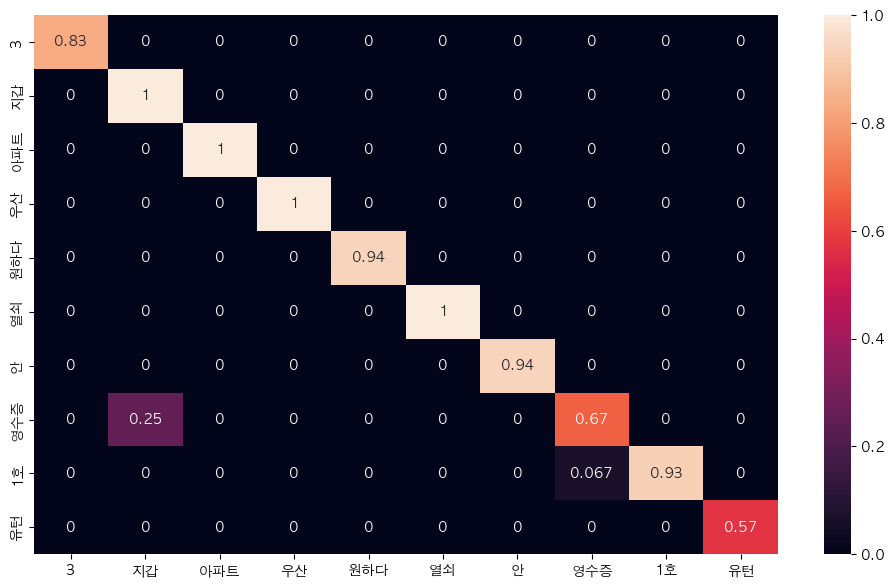

In [130]:
for i in range(10):
    for j in range(10):
        print(i)
        str_i = i*10
        end_i = (i+1)*10
        str_j = j*10
        end_j = (j+1)*10

        cf = np.load(cf_path)
        sub_cf = cf[str_i:end_i, str_j:end_j]

        df_cm = pd.DataFrame(sub_cf / np.sum(cf, axis=1)[str_i:end_i], index=[x for x in label[str_i:end_i]], columns=[x for x in label[str_j:end_j]]).fillna(0)

        plt.figure(figsize=(12, 7))
        fig = sns.heatmap(df_cm, vmin=0.0, vmax=1.0, annot=True).get_figure()
        fig.savefig(os.path.join(cf_dir, "{}_{}.png".format(i, j)))

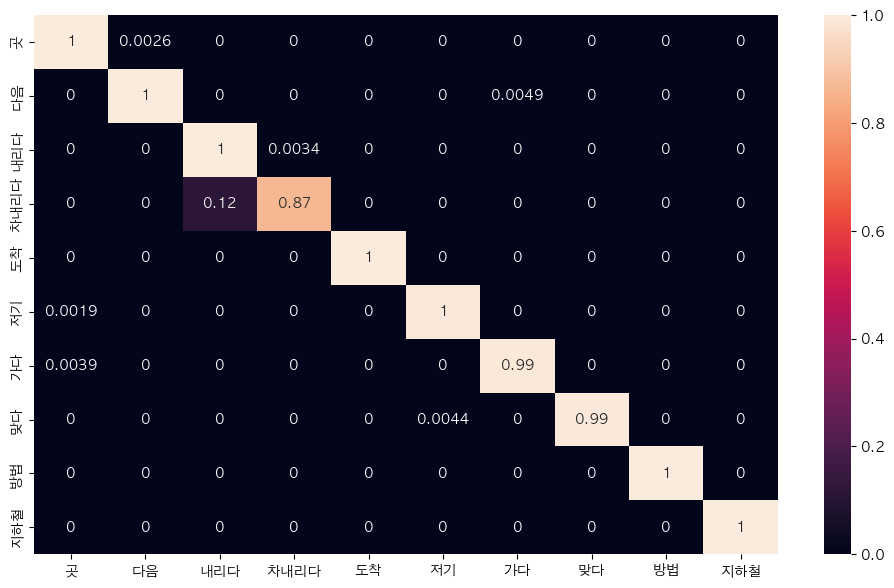

In [33]:
plt.figure(figsize=(12, 7))
fig = sns.heatmap(df_cm, annot=True).get_figure()
fig.savefig("./1.png")

In [131]:
tps = []
fps = []
fns = []

for i in range(100):
    tt = cf[i,:].sum()
    tp = cf[i][i]
    fn = tt-tp

    pt = cf[:,i].sum()
    fp = pt - tp

    tps.append(tp)
    fps.append(fp)
    fns.append(fn)

In [114]:
fns[84]

19.0

In [132]:
# accuracy
np.array(tps).sum() / cf.sum()

0.9633010432190761

In [133]:
precision = []
recall = []

for i in range(100):
    precision.append(tps[i] / (tps[i] + fps[i]+np.finfo(float).eps))
    recall.append(tps[i] / (tps[i] + fns[i]+np.finfo(float).eps))

In [135]:
macro_pr =  np.array(precision).sum() / 100
macro_re = np.array(recall).sum() / 100
print("Macro precision: ", macro_pr)
print("Macro recall: ", macro_re)

Macro precision:  0.9483047386026413
Macro recall:  0.9313501387424686


In [136]:
num_tp = np.array(tps).sum()
num_fp = np.array(fps).sum()
num_fn = np.array(fns).sum()

micro_pr = num_tp / (num_tp + num_fp)
micro_re = num_tp / (num_tp + num_fn)

print("Micro precision: ", micro_pr)
print("Micro recall: ", micro_re)

Micro precision:  0.9633010432190761
Micro recall:  0.9633010432190761


In [137]:
macro_f1 = 2 * (macro_pr * macro_re) / (macro_pr + macro_re)
micro_f1 = 2 * (micro_pr * micro_re) / (micro_pr + micro_re)
print("Macro f1 score: ", macro_f1)
print("Micro f1 score: ", micro_f1)

Macro f1 score:  0.9397509729181542
Micro f1 score:  0.9633010432190761


In [94]:
f1s = []

for i in range(100):
    f1 = 2 * (precision[i]*recall[i]) / (precision[i]+ recall[i]+np.finfo(float).eps)
    f1s.append(f1)

In [95]:
np.array(f1s)

array([0.9206066 , 0.9843342 , 0.93521127, 0.90161002, 0.99788584,
       0.98245614, 0.90786517, 0.9470405 , 1.        , 0.98591549,
       0.97222222, 0.92237443, 0.93779904, 0.80239521, 0.96385542,
       0.99363057, 0.48598131, 0.97931034, 0.94964029, 0.86764706,
       0.83916084, 0.54761905, 1.        , 0.8       , 0.9010989 ,
       0.81318681, 0.81632653, 0.95121951, 0.89855072, 0.79411765,
       0.91666667, 1.        , 0.85714286, 0.94736842, 0.52631579,
       0.55319149, 0.8       , 0.98113208, 0.7761194 , 0.82142857,
       0.92      , 0.54054054, 0.76190476, 0.8372093 , 0.68421053,
       0.88372093, 0.95833333, 0.21428571, 0.77966102, 0.93333333,
       1.        , 0.87804878, 0.9047619 , 0.48275862, 0.86486486,
       0.97560976, 0.71111111, 0.48648649, 0.5862069 , 0.82926829,
       0.93617021, 0.97435897, 0.46666667, 0.85714286, 0.76470588,
       0.88888889, 0.76923077, 0.97297297, 0.77419355, 0.86363636,
       0.        , 0.73170732, 1.        , 1.        , 0.92682

/var/folders/76/mq28r9js2490jxdy_b1rhjgc0000gn/T/ipykernel_61347/3359670931.py:8: RuntimeWarning: invalid value encountered in divide
  df_cm = pd.DataFrame(cf / np.sum(cf, axis=1), index=[x for x in label[str_idx:end_idx]], columns=[x for x in label[str_idx:end_idx]]).fillna(0)


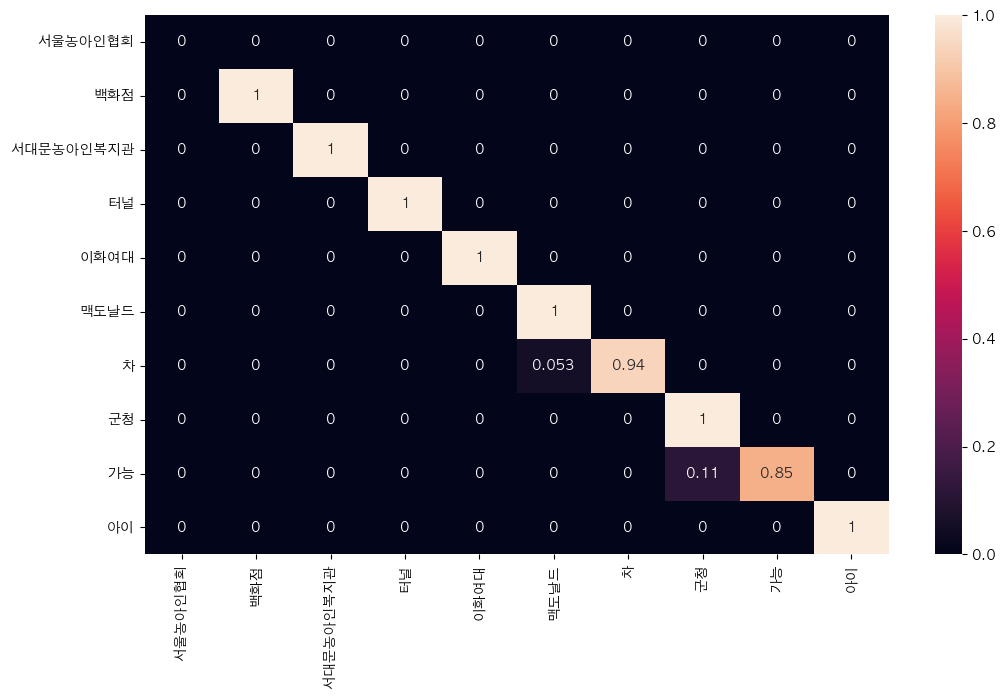

In [52]:
i = 7

str_idx = i*10
end_idx = (i+1)*10

cf = np.load(cf_path)
cf = cf[str_idx:end_idx, str_idx:end_idx]
df_cm = pd.DataFrame(cf / np.sum(cf, axis=1), index=[x for x in label[str_idx:end_idx]], columns=[x for x in label[str_idx:end_idx]]).fillna(0)

plt.figure(figsize=(12, 7))
fig = sns.heatmap(df_cm, annot=True).get_figure()
fig.savefig("./{}.png".format(i))